In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_dash= pd.read_csv("messy_sales_dashboard_dataset.csv")

In [3]:
sales_dash.head()

,Custmr Name,Order Dt,Sales ($),Profit ($),Discnt,Region,Category,Sub-Category,Customer Segment,Quantity
0,Report Generated: 2025-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Sales data includes returns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Customer Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0


### Removing noise from column name

In [4]:
sales_dash.columns=sales_dash.columns.str.strip().str.replace(' ','').str.replace('($)','')

In [5]:
sales_dash.head()

,CustmrName,OrderDt,Sales,Profit,Discnt,Region,Category,Sub-Category,CustomerSegment,Quantity
0,Report Generated: 2025-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Sales data includes returns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Customer Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0


### Rename Column Names

In [6]:
rename_col={
    'CustmrName':'Customer_Name',
    'OrderDt':'Order_Date',
    'Discnt':'Discount',
    'Sub-Category':'Sub_Category',
    'CustomerSegment':'Customer_Segment'
}
sales_dash=sales_dash.rename(columns=rename_col)

In [7]:
sales_dash.head()

,Customer_Name,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
0,Report Generated: 2025-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Sales data includes returns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Customer Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0


### Remove 4 lines from above and between the two tables by date is not null

In [8]:
sales_dash=sales_dash[sales_dash['Order_Date'].notna()]

### Drop column with all null values

In [9]:
sales_dash.drop(columns=['Customer_Name'],inplace=True)

In [10]:
sales_dash

,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
4,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0
5,2024-06-22 13:09:54.594594592,1554.25,805.9,0.13,East,Technology,Paper,Consumer,1.0
6,2024-06-24 17:46:40.000000000,2129.58,589.54,0.17,North,OfficeSup,Accessories,Home Office,5.0
7,2024-04-27 06:46:29.189189184,1734.67,421.34,NaN,South,OfficeSup,Accessories,Home Office,5.0
8,2023-10-28 07:55:40.540540540,2.6k,387.81,0.26,South,OfficeSup,Accessories,Home Office,6.0
...,...,...,...,...,...,...,...,...,...
215,2024-10-07 05:38:44.324324320,"2,690.75",750.66,0.19,South,OfficeSup,Tables,Home Office,8.0
216,2024-02-21 12:23:47.027027024,"2,793.07",-300.91,NaN,West,OfficeSup,Storage,Home Office,2.0
217,2024-05-11 03:59:16.756756752,2992.14,268.09,NaN,West,Technology,Paper,Home Office,8.0
218,2023-02-16 00:51:53.513513513,1473.64,-302.83,0.11,East,Technology,Laptops,Home Office,7.0


### Drop duplicate values

In [11]:
sales_dash.drop_duplicates(inplace=True)

In [12]:
sales_dash

,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
4,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0
5,2024-06-22 13:09:54.594594592,1554.25,805.9,0.13,East,Technology,Paper,Consumer,1.0
6,2024-06-24 17:46:40.000000000,2129.58,589.54,0.17,North,OfficeSup,Accessories,Home Office,5.0
7,2024-04-27 06:46:29.189189184,1734.67,421.34,NaN,South,OfficeSup,Accessories,Home Office,5.0
8,2023-10-28 07:55:40.540540540,2.6k,387.81,0.26,South,OfficeSup,Accessories,Home Office,6.0
...,...,...,...,...,...,...,...,...,...
199,2023-10-26 03:18:55.135135136,3.9k,-413.9,0.28,South,Furniture,Tables,Home Office,2.0
200,2023-08-31 14:27:44.864864864,4290.51,877.53,0.23,South,Technology,Binders,Consumer,8.0
201,2023-06-01 23:48:28.108108108,1406.71,-324.9,0.30,West,Technology,Accessories,Consumer,4.0
202,2024-03-23 22:30:37.837837840,3.4k,745.46,NaN,West,Technology,Accessories,Consumer,5.0


### Copy dataframe

In [13]:
sd=sales_dash.copy()

In [14]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4 to 203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Date        200 non-null    object 
 1   Sales             200 non-null    object 
 2   Profit            200 non-null    object 
 3   Discount          168 non-null    float64
 4   Region            200 non-null    object 
 5   Category          200 non-null    object 
 6   Sub_Category      200 non-null    object 
 7   Customer_Segment  200 non-null    object 
 8   Quantity          200 non-null    float64
dtypes: float64(2), object(7)
memory usage: 15.6+ KB


### Handling null values of discount column


In [15]:
sd['Discount'].fillna(0,inplace=True)

In [16]:
sd[sd['Discount'].isnull()]

,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity


In [17]:
sd.head()

,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
4,2024-01-16 17:03:25.405405404,4268.33,967.81,0.12,North,OfficeSup,Bookcases,Consumer,1.0
5,2024-06-22 13:09:54.594594592,1554.25,805.9,0.13,East,Technology,Paper,Consumer,1.0
6,2024-06-24 17:46:40.000000000,2129.58,589.54,0.17,North,OfficeSup,Accessories,Home Office,5.0
7,2024-04-27 06:46:29.189189184,1734.67,421.34,0.00,South,OfficeSup,Accessories,Home Office,5.0
8,2023-10-28 07:55:40.540540540,2.6k,387.81,0.26,South,OfficeSup,Accessories,Home Office,6.0


In [18]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4 to 203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Date        200 non-null    object 
 1   Sales             200 non-null    object 
 2   Profit            200 non-null    object 
 3   Discount          200 non-null    float64
 4   Region            200 non-null    object 
 5   Category          200 non-null    object 
 6   Sub_Category      200 non-null    object 
 7   Customer_Segment  200 non-null    object 
 8   Quantity          200 non-null    float64
dtypes: float64(2), object(7)
memory usage: 15.6+ KB


### Change datatypes

In [19]:
sd['Order_Date']=pd.to_datetime(sd['Order_Date'], errors='coerce')

In [20]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4 to 203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Date        200 non-null    datetime64[ns]
 1   Sales             200 non-null    object        
 2   Profit            200 non-null    object        
 3   Discount          200 non-null    float64       
 4   Region            200 non-null    object        
 5   Category          200 non-null    object        
 6   Sub_Category      200 non-null    object        
 7   Customer_Segment  200 non-null    object        
 8   Quantity          200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 15.6+ KB


In [21]:
sd['Sales']=pd.to_numeric(sd['Sales'].str.replace(',','').str.replace('k','e3'))

In [22]:
sd['Profit']=pd.to_numeric(sd['Profit'].str.replace(',','').str.replace('k','e3'))

In [23]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 4 to 203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Date        200 non-null    datetime64[ns]
 1   Sales             200 non-null    float64       
 2   Profit            200 non-null    float64       
 3   Discount          200 non-null    float64       
 4   Region            200 non-null    object        
 5   Category          200 non-null    object        
 6   Sub_Category      200 non-null    object        
 7   Customer_Segment  200 non-null    object        
 8   Quantity          200 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 15.6+ KB


In [24]:
sd['Discount'] = pd.to_numeric(sd['Discount']*100, errors='coerce')

In [25]:
sd['Discount']=sd['Discount'].astype(int)
sd['Quantity']=sd['Quantity'].astype(int)

In [26]:
sd

,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
4,2024-01-16 17:03:25.405405404,4268.33,967.81,12,North,OfficeSup,Bookcases,Consumer,1
5,2024-06-22 13:09:54.594594592,1554.25,805.90,13,East,Technology,Paper,Consumer,1
6,2024-06-24 17:46:40.000000000,2129.58,589.54,17,North,OfficeSup,Accessories,Home Office,5
7,2024-04-27 06:46:29.189189184,1734.67,421.34,0,South,OfficeSup,Accessories,Home Office,5
8,2023-10-28 07:55:40.540540540,2600.00,387.81,26,South,OfficeSup,Accessories,Home Office,6
...,...,...,...,...,...,...,...,...,...
199,2023-10-26 03:18:55.135135136,3900.00,-413.90,28,South,Furniture,Tables,Home Office,2
200,2023-08-31 14:27:44.864864864,4290.51,877.53,23,South,Technology,Binders,Consumer,8
201,2023-06-01 23:48:28.108108108,1406.71,-324.90,30,West,Technology,Accessories,Consumer,4
202,2024-03-23 22:30:37.837837840,3400.00,745.46,0,West,Technology,Accessories,Consumer,5


In [27]:
sd.reset_index(inplace=True)

In [28]:
sd.drop(columns='index',inplace=True)

### Add column at 1st position as Order_Id

In [29]:
sd.insert(0,'Order_Id',range(1, len(sd)+1))

In [30]:
sd.head(2)

,Order_Id,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
0,1,2024-01-16 17:03:25.405405404,4268.33,967.81,12,North,OfficeSup,Bookcases,Consumer,1
1,2,2024-06-22 13:09:54.594594592,1554.25,805.90,13,East,Technology,Paper,Consumer,1


### export for analysis directly in tableau

In [31]:
sd.to_csv("clean_sales_dashboard_data.csv",index=False)

### Further analysis 
## Numerical columns
- sales
- profit
- discount
- quantity
## Categorical columns
- orderid
- region
- category
- subcategory
- customersegment
## Mixed columns
- orderdate

In [32]:
sd['Region'].value_counts()

Region
South    54
East     52
West     51
North    43
Name: count, dtype: int64

In [33]:
sd['Category'].value_counts()

Category
Technology    68
OfficeSup     67
Furniture     65
Name: count, dtype: int64

In [34]:
sd['Sub_Category'].value_counts()

Sub_Category
Phones         26
Laptops        25
Paper          25
Bookcases      24
Accessories    23
Storage        23
Binders        19
Chairs         18
Tables         17
Name: count, dtype: int64

In [35]:
sd['Customer_Segment'].value_counts()

Customer_Segment
Consumer       70
Home Office    70
Corporate      60
Name: count, dtype: int64

In [36]:
sd.describe()

,Order_Id,Order_Date,Sales,Profit,Discount,Quantity
count,200.000000,200,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2024-01-07 02:00:00,2746.351450,466.915100,12.725000,5.210000
min,1.000000,2023-01-08 07:22:31.351351351,115.520000,-493.720000,0.000000,1.000000
25%,50.750000,2023-07-19 02:58:44.324324352,1596.412500,-46.752500,4.000000,3.000000
50%,100.500000,2024-01-20 17:30:48.648648704,2906.840000,473.425000,12.000000,6.000000
75%,150.250000,2024-06-26 22:23:25.405405440,3906.397500,963.685000,21.000000,7.000000
max,200.000000,2024-12-30 06:27:44.864864864,5000.000000,1500.000000,30.000000,9.000000
std,57.879185,NaN,1450.356478,580.171477,9.407544,2.555101


Focus on these and find patterns in further analysis:
- Sales: min 115.5 and max 5000
- Profit: min -493 and max 1500
- Discount: min 0 and max 30
- Qunatity: min 1 and max 9

## Univariate/Bivariate Analysis

In [37]:
sd.head()

,Order_Id,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity
0,1,2024-01-16 17:03:25.405405404,4268.33,967.81,12,North,OfficeSup,Bookcases,Consumer,1
1,2,2024-06-22 13:09:54.594594592,1554.25,805.90,13,East,Technology,Paper,Consumer,1
2,3,2024-06-24 17:46:40.000000000,2129.58,589.54,17,North,OfficeSup,Accessories,Home Office,5
3,4,2024-04-27 06:46:29.189189184,1734.67,421.34,0,South,OfficeSup,Accessories,Home Office,5
4,5,2023-10-28 07:55:40.540540540,2600.00,387.81,26,South,OfficeSup,Accessories,Home Office,6


Region
South    27.0
East     26.0
West     25.5
North    21.5
Name: count, dtype: float64


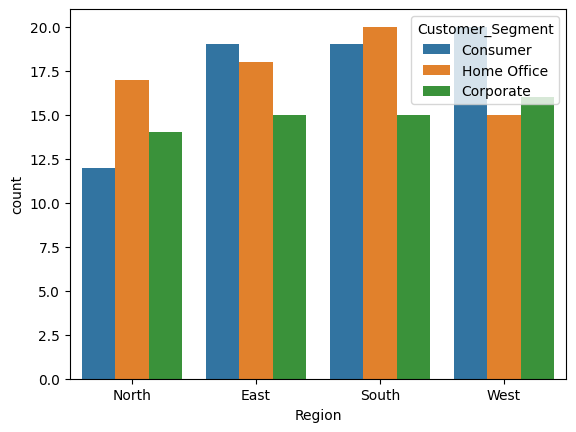

In [38]:
sns.countplot(x=sd['Region'], hue=sd['Customer_Segment'])
print((sd['Region'].value_counts()/200)*100)

Category
Technology    34.0
OfficeSup     33.5
Furniture     32.5
Name: count, dtype: float64

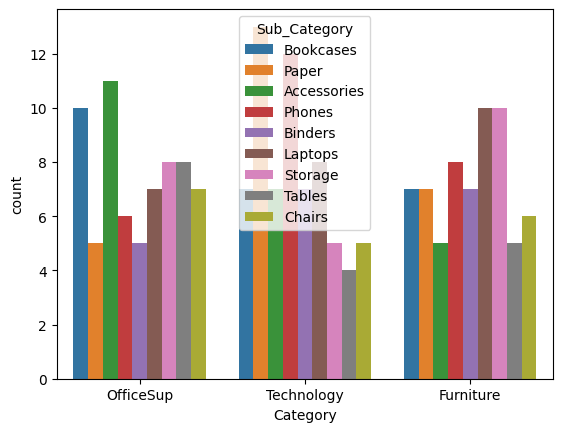

In [39]:
sns.countplot(x=sd['Category'],hue=sd['Sub_Category'])
(sd['Category'].value_counts()/200)*100

Sub_Category
Phones         13.0
Laptops        12.5
Paper          12.5
Bookcases      12.0
Accessories    11.5
Storage        11.5
Binders         9.5
Chairs          9.0
Tables          8.5
Name: count, dtype: float64

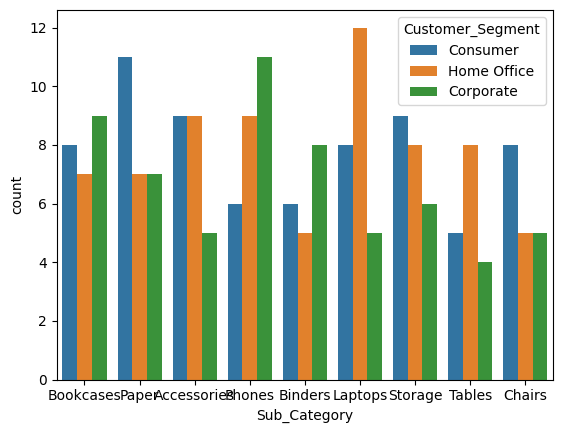

In [40]:
sns.countplot(x=sd['Sub_Category'],hue=sd['Customer_Segment'])
(sd['Sub_Category'].value_counts()/200)*100

Customer_Segment
Consumer       35.0
Home Office    35.0
Corporate      30.0
Name: count, dtype: float64

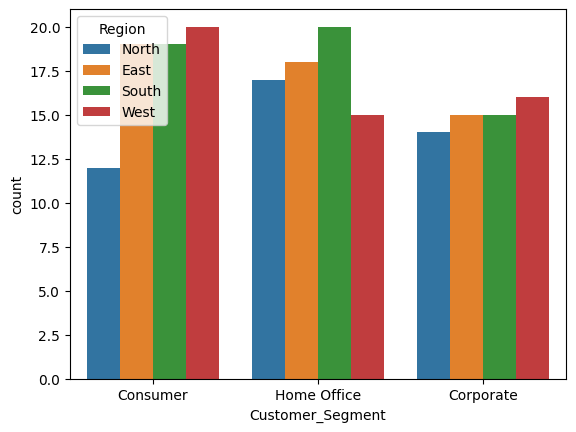

In [41]:
sns.countplot(x=sd['Customer_Segment'],hue=sd['Region'])
(sd['Customer_Segment'].value_counts()/200)*100

### Conclusion
- Dimension: South 
    - Metric: Order count
    - Highlight: Most orders in Office Setup → Bookcases sub-category → Home & Office segments
    - Implication: These are the key drivers in South
- Dimension: West 
    - Metric: Order count
    - Highlight: Balanced categories/sub-categories, but Consumer + Corporate lead in customer segment
    - Implication: Sales in West are more segment-driven than product-driven.
- Dimension: East 
    - Metric: Order count
    - Highlight: High in Technology  + Furniture (sub_categories:Laptops,Storage) whereas Low in Office Setup due to lowest Binders in subcategory.
    - Implication: Customer Segment is Balanced, no dominance
- Dimension: North
    - Metric: Order count
    - Highlight: Technology and Furniture categories show lower order counts, with Tables being the weakest sub-category.
    - Implication: Consumer and Corporate segments have the lowest order counts in this region.

<Axes: xlabel='Profit_Bin', ylabel='count'>

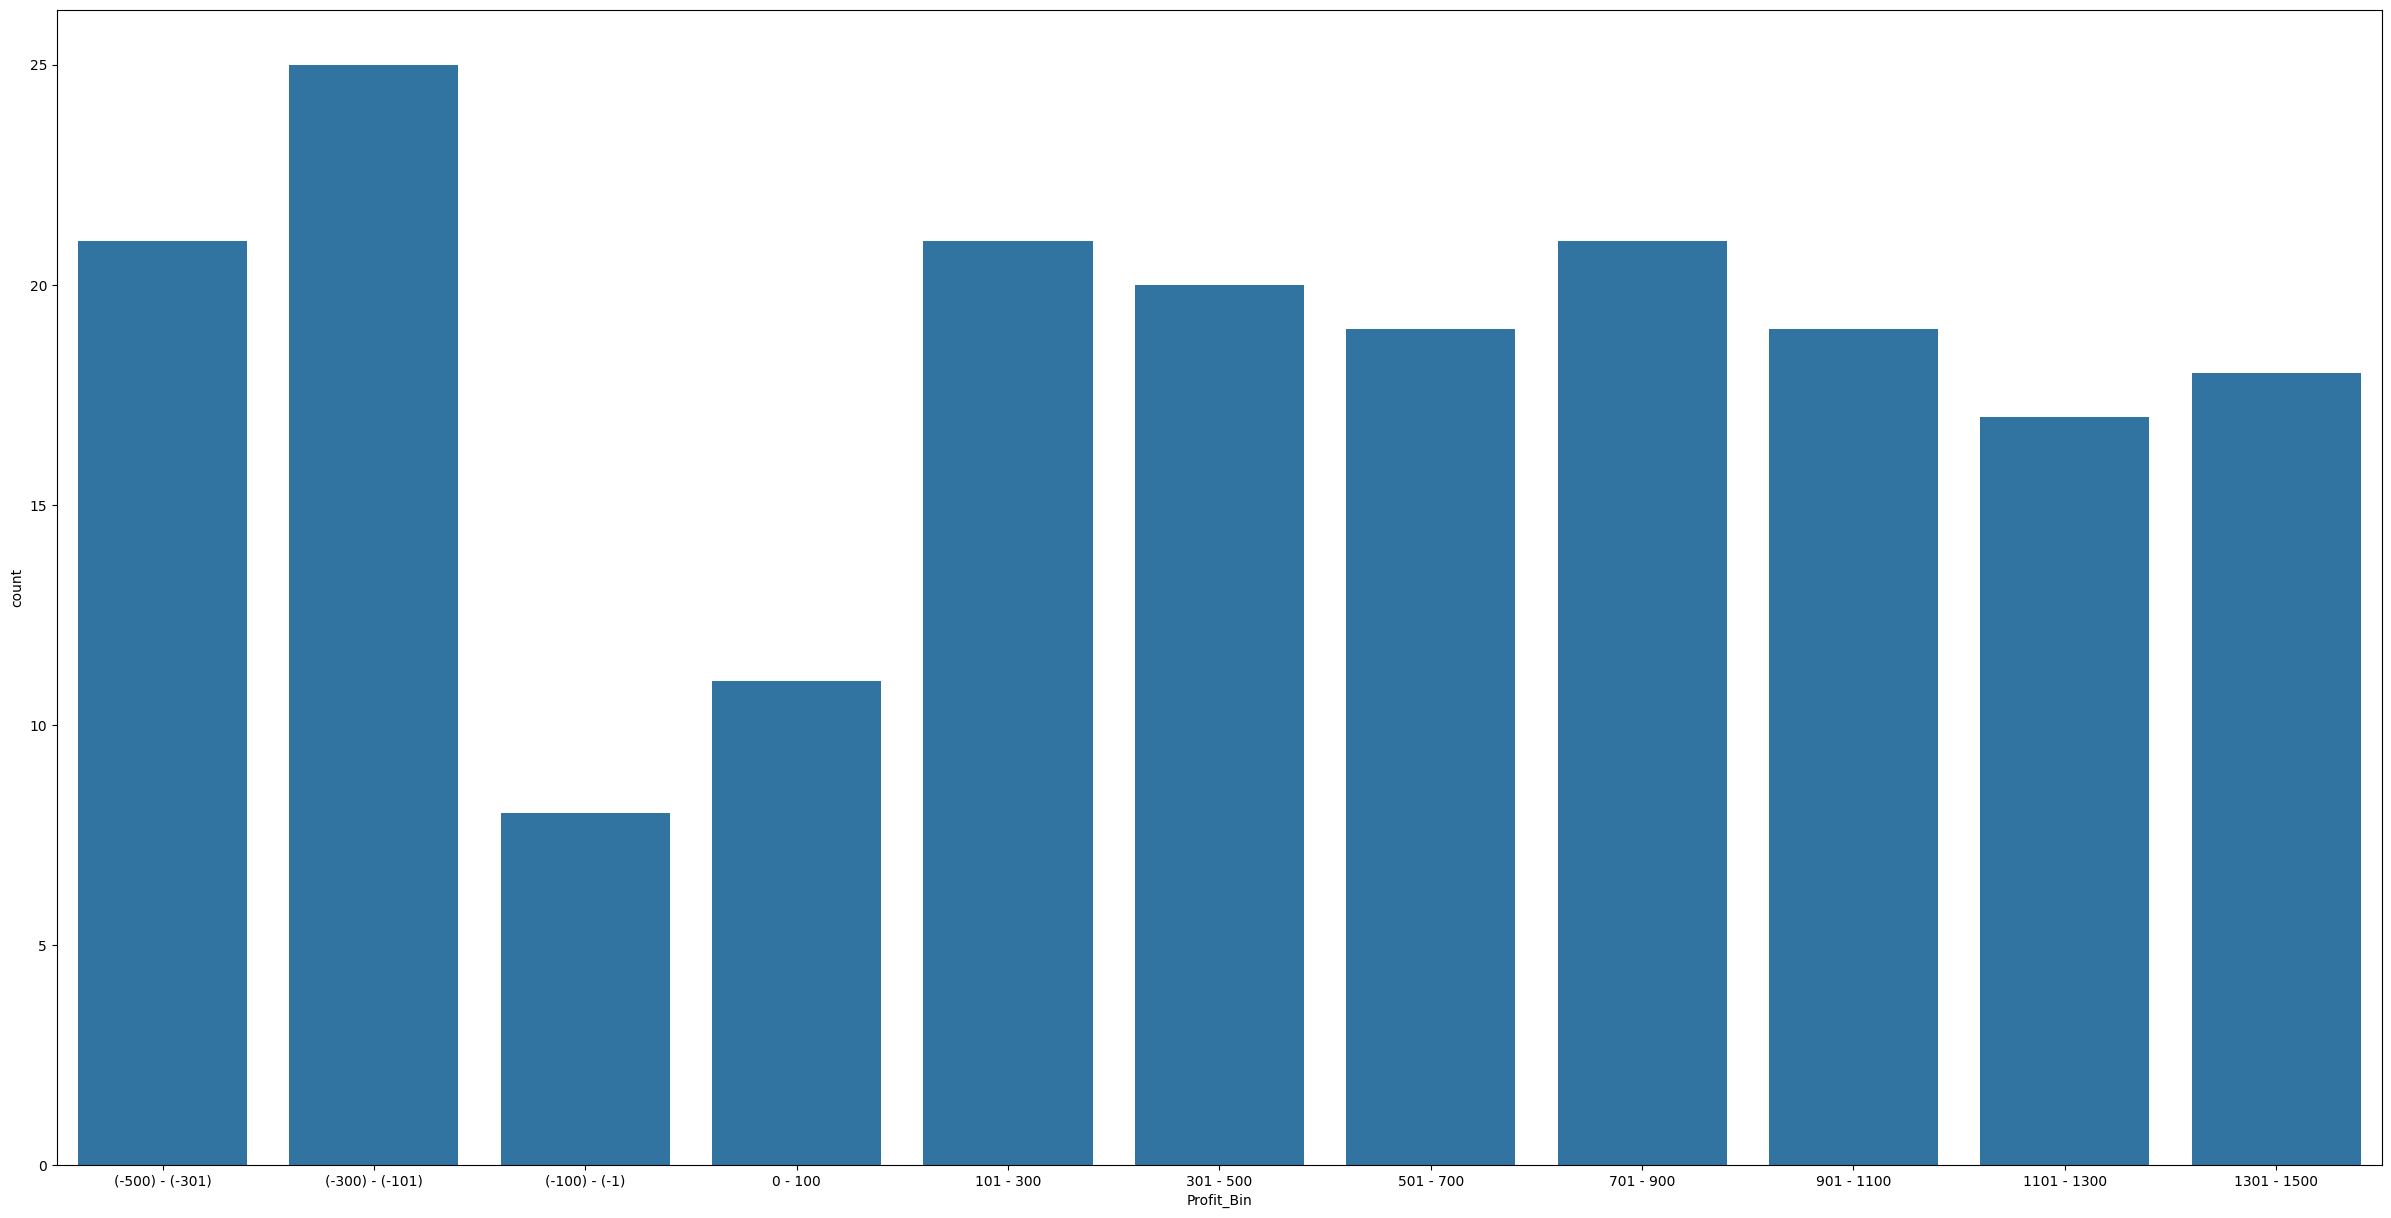

In [42]:
profit_bins = [-500,-300,-100,0,100,300,500,700,900,1100,1300, sd["Profit"].max()]
profit_labels = ["(-500) - (-301)","(-300) - (-101)","(-100) - (-1)","0 - 100","101 - 300","301 - 500", "501 - 700", "701 - 900"
                 ,"901 - 1100","1101 - 1300","1301 - 1500"]

sd["Profit_Bin"] = pd.cut(sd["Profit"], bins=profit_bins, labels=profit_labels, include_lowest=True)
plt.figure(figsize=(30,15))
sns.countplot(data=sd, x="Profit_Bin", order=profit_labels)


Profit: 146
Loss: 54


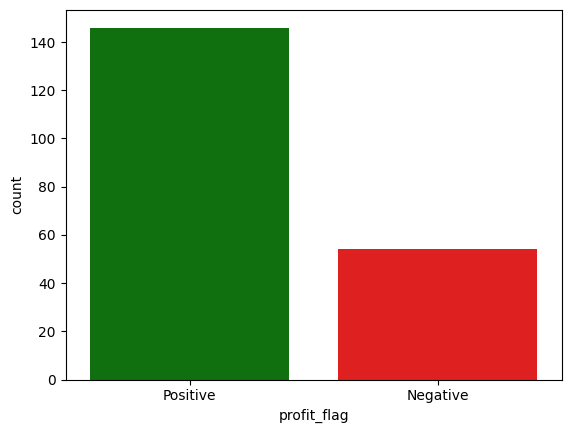

In [43]:
sd['profit_flag']=sd['Profit'].apply(lambda x:"Positive"if x>=0 else "Negative")
sns.countplot(data=sd,x='profit_flag', palette={"Positive":"green", "Negative":"red"})
print("Profit:",sd[sd['profit_flag']=='Positive'].shape[0])
print("Loss:",sd[sd['profit_flag']=='Negative'].shape[0])
# print("Profit:",sd[sd['profit_flag']=='Positive'].shape[0]/200*100)
# print("Loss:",sd[sd['profit_flag']=='Negative'].shape[0]/200*100)

- 27% of all orders (≈54 out of 200) generated a loss (negative profit)

<Axes: xlabel='profit_flag', ylabel='count'>

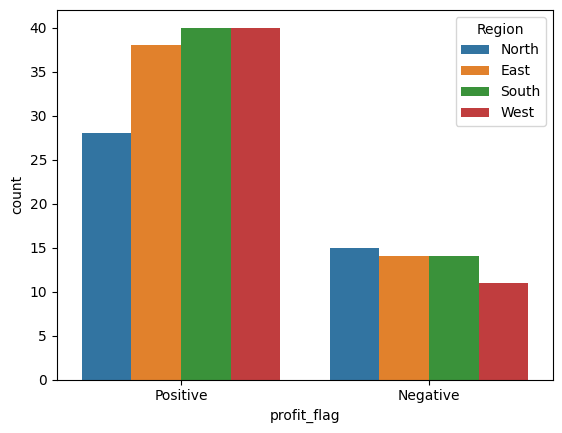

In [44]:
sns.countplot(x=sd['profit_flag'], hue=sd['Region'])

- North region has min profit and max loss.

<Axes: xlabel='profit_flag', ylabel='count'>

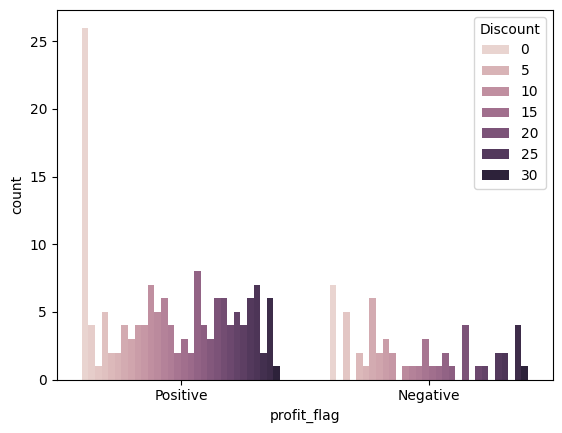

In [45]:
sns.countplot(x=sd['profit_flag'], hue=sd['Discount'])

In [46]:
# Total profit per discount
total_profit = sd.groupby("Discount")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False)
print("Total Profit by Discount:")
print(total_profit)

# Mean profit per discount
mean_profit = sd.groupby("Discount")["Profit"].mean().reset_index().sort_values(by="Profit", ascending=False)
print("\nMean Profit by Discount:")
print(mean_profit)

# Count of profit_flag per discount (positive vs negative)
profit_flag_count = sd.groupby(["Discount", "profit_flag"]).size().reset_index(name="count")
print("\nProfit Flag Count by Discount:")
print(profit_flag_count)


Total Profit by Discount:
    Discount    Profit
0          0  15701.46
25        25   5372.06
21        21   5331.48
11        11   5085.10
17        17   4552.32
10        10   4461.18
12        12   4400.55
3          3   4248.86
26        26   3920.61
20        20   3776.76
23        23   3573.92
28        28   3389.73
24        24   3311.07
18        18   3307.53
16        16   2605.78
15        15   2569.30
22        22   2548.39
9          9   2540.66
1          1   2327.24
27        27   2272.07
7          7   2125.32
19        19   2082.35
14        14   1577.80
13        13   1472.25
4          4    693.91
6          6    190.91
2          2    157.21
5          5     23.94
8          8    -47.81
29        30   -188.93

Mean Profit by Discount:
    Discount       Profit
27        27  1136.035000
21        21   888.580000
16        16   868.593333
3          3   849.772000
11        11   847.516667
24        24   827.767500
19        19   694.116667
25        25   671.507500
1

- 0% discount contributes the most total profit, but not the best average profit (volume effect, not efficiency).
- 30% discount is clearly unprofitable (mean negative, total negative).


<Axes: xlabel='profit_flag', ylabel='count'>

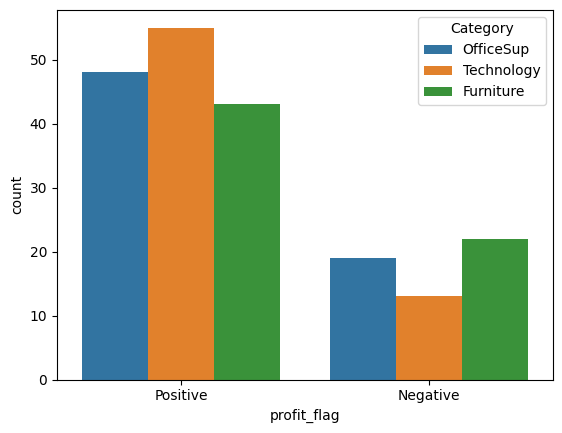

In [47]:
sns.countplot(x=sd['profit_flag'], hue=sd['Category'])

- Technology is responsible for most Profit
- Furniture is responsible for most Loss

<Axes: xlabel='profit_flag', ylabel='count'>

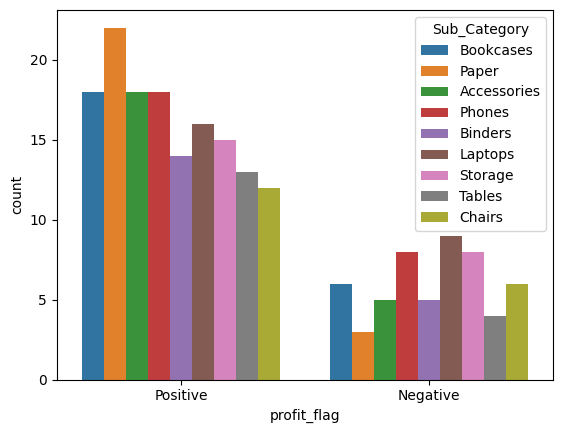

In [48]:
sns.countplot(x=sd['profit_flag'], hue=sd['Sub_Category'])

- Paper is the most profitable
- Top 5 items responsibe for loss rank-wise are:
    - Laptops
    - Phones/Storage
    - Bookcases/Chairs

<Axes: xlabel='Discount_Bin', ylabel='count'>

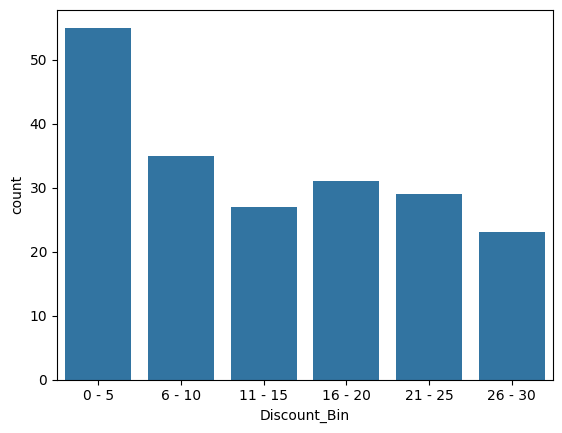

In [49]:
discount_bins = [0,5,10,15,20,25, sd["Discount"].max()]
discount_labels = ["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 30"]

sd["Discount_Bin"] = pd.cut(sd["Discount"], bins=discount_bins, labels=discount_labels, include_lowest=True)
sns.countplot(data=sd, x="Discount_Bin", order=discount_labels)

<Axes: xlabel='Discount_Bin', ylabel='count'>

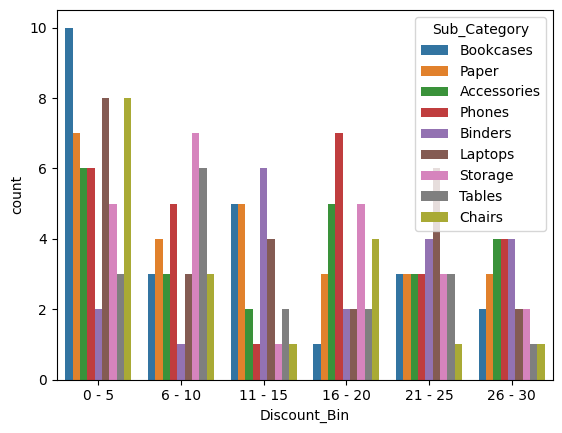

In [50]:
sns.countplot(x=sd['Discount_Bin'], hue=sd['Sub_Category'])

<Axes: xlabel='Discount_Bin', ylabel='count'>

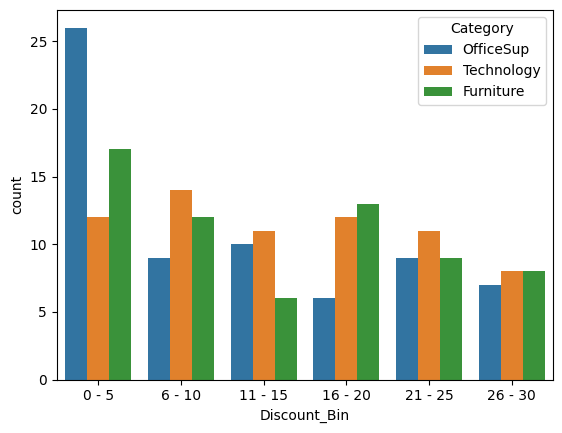

In [51]:
sns.countplot(x=sd['Discount_Bin'], hue=sd['Category'])

<Axes: xlabel='Discount_Bin', ylabel='count'>

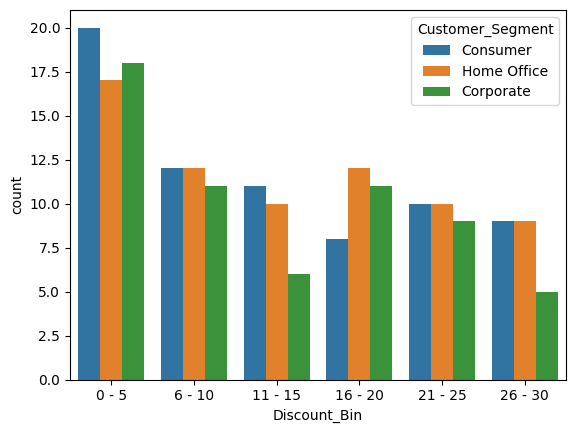

In [52]:
sns.countplot(x=sd['Discount_Bin'], hue=sd['Customer_Segment'])

<Axes: xlabel='Discount_Bin', ylabel='count'>

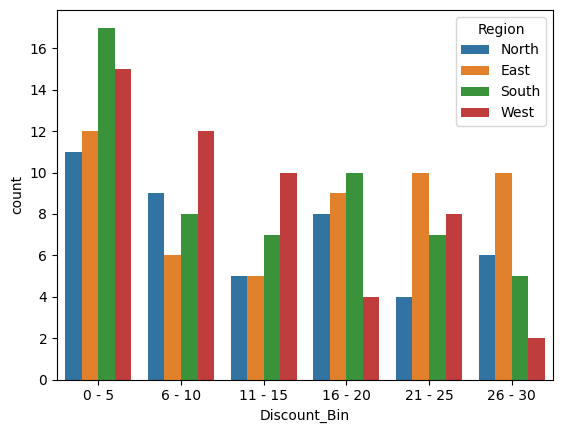

In [53]:
sns.countplot(x=sd['Discount_Bin'], hue=sd['Region'])

<Axes: xlabel='Discount_Bin', ylabel='count'>

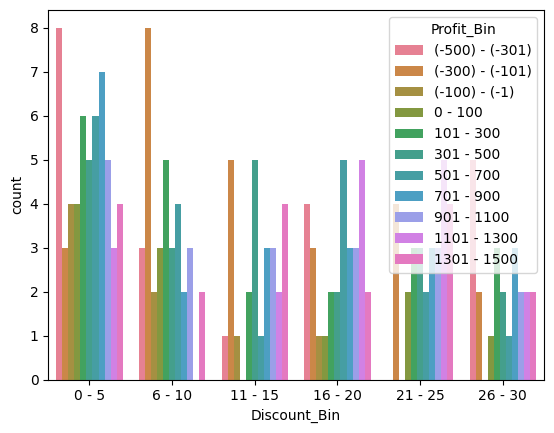

In [54]:
sns.countplot(x=sd['Discount_Bin'], hue=sd['Profit_Bin'])

- If count of 0 discount is the most and -500 to -300 is the most in this range i.e. Most Loss
- No or 0 discount in Category: OfficeSetup, Sub_Category: Bookcases, Customer_Segment: Consumer and Region:South results in Loss

<Axes: xlabel='Sales_Bin', ylabel='count'>

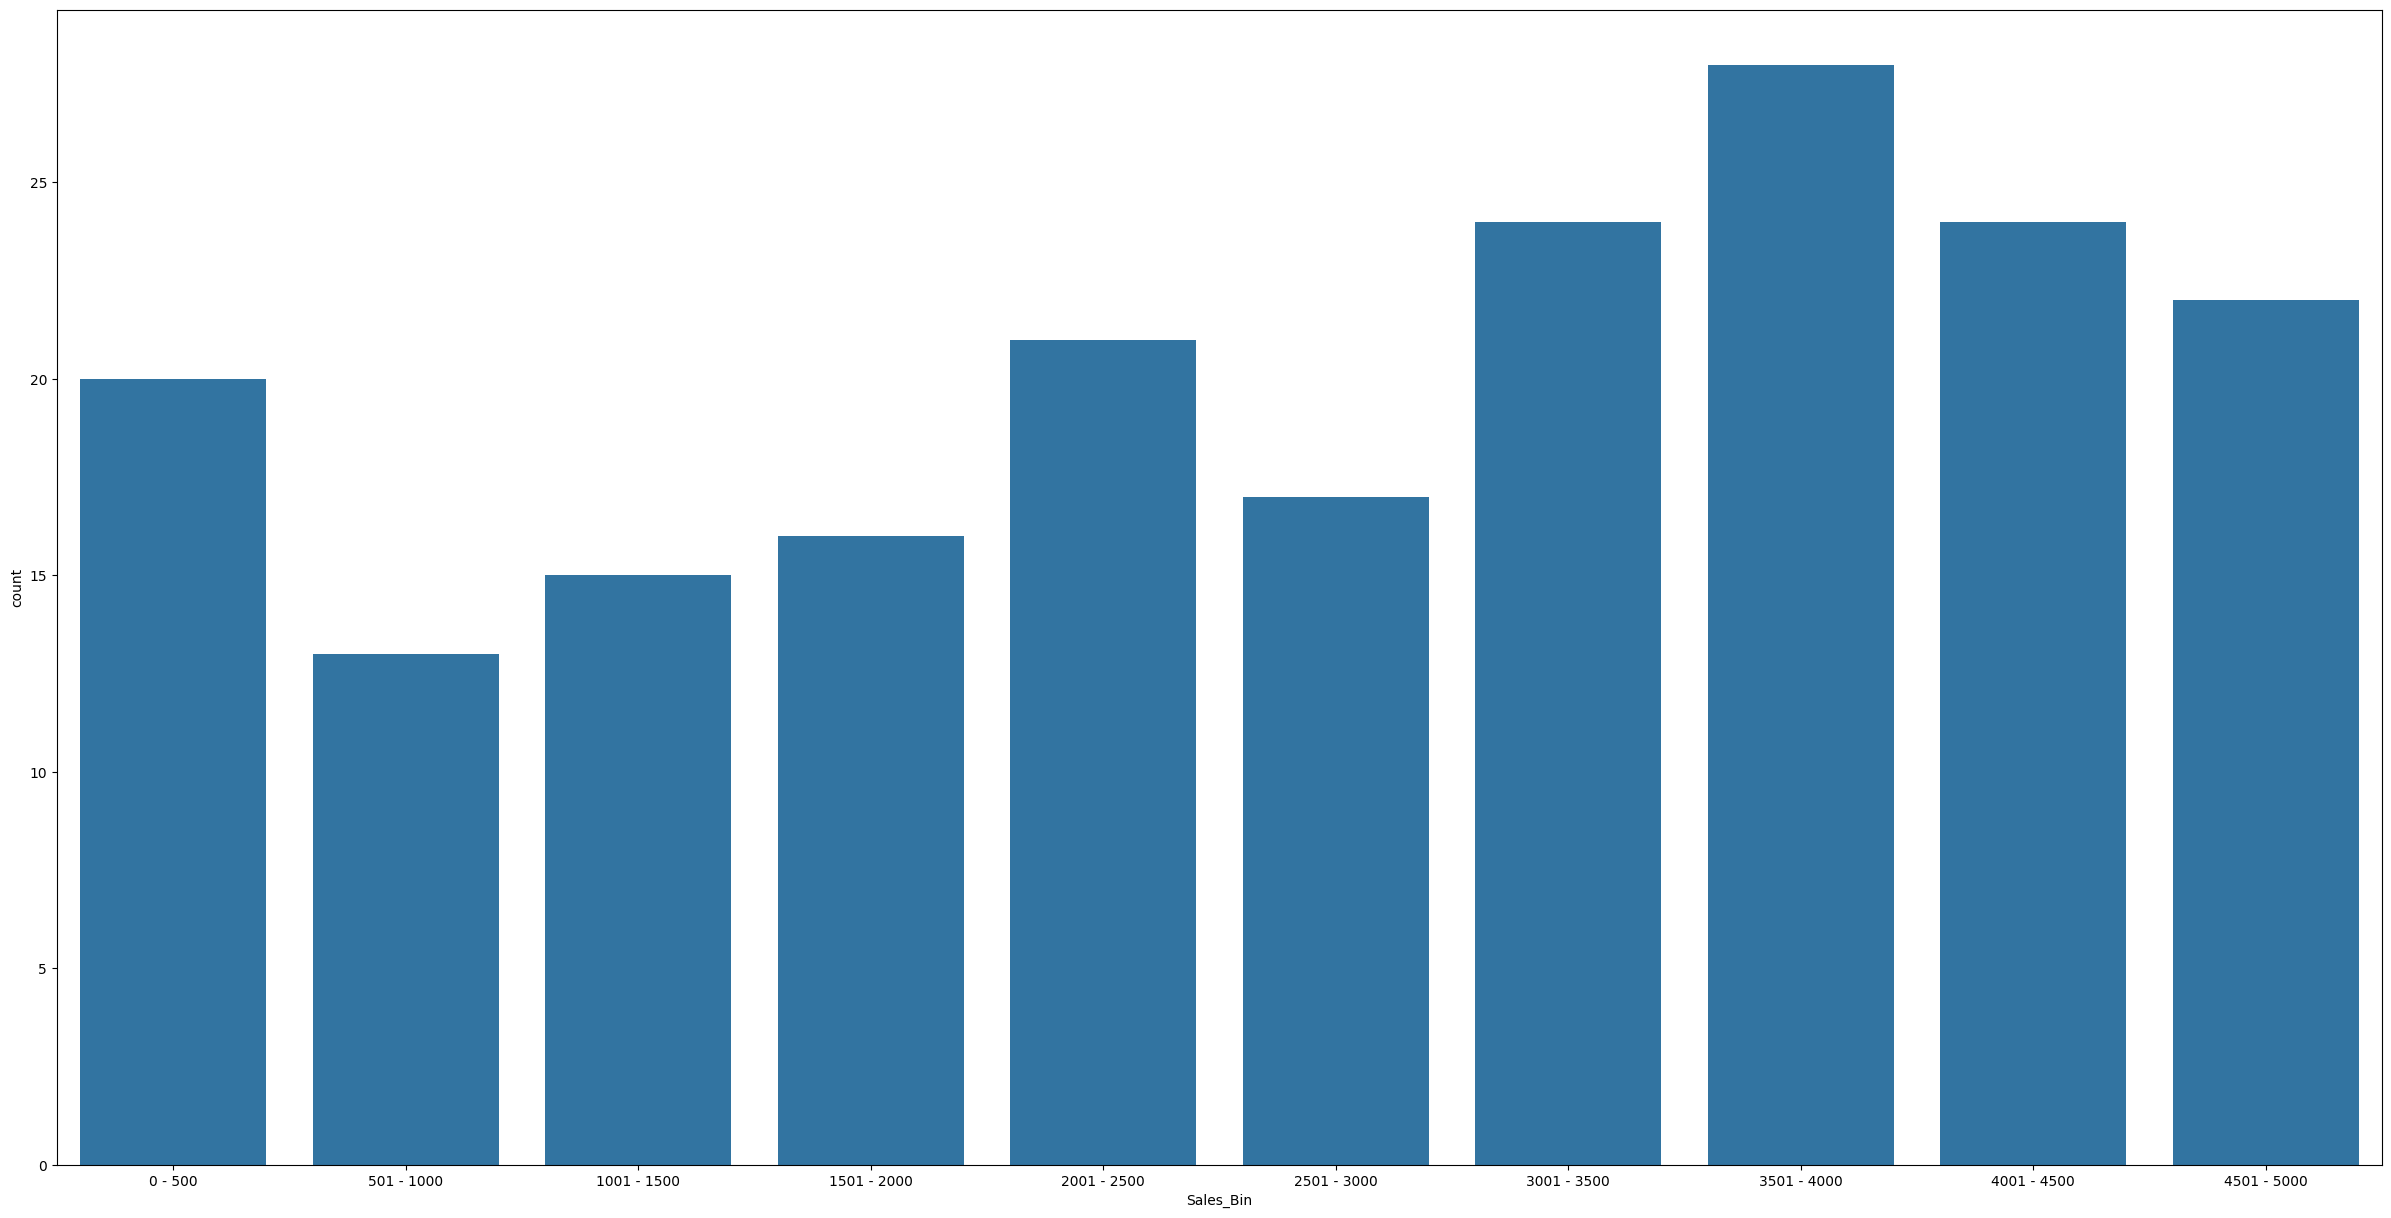

In [55]:
sales_bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500, sd["Sales"].max()]
sales_labels = ["0 - 500","501 - 1000","1001 - 1500", "1501 - 2000", "2001 - 2500","2501 - 3000"
                 ,"3001 - 3500","3501 - 4000","4001 - 4500","4501 - 5000"]

sd["Sales_Bin"] = pd.cut(sd["Sales"], bins=sales_bins, labels=sales_labels, include_lowest=True)
plt.figure(figsize=(30,15))
sns.countplot(data=sd, x="Sales_Bin", order=sales_labels)

<Axes: xlabel='Sales_Bin', ylabel='count'>

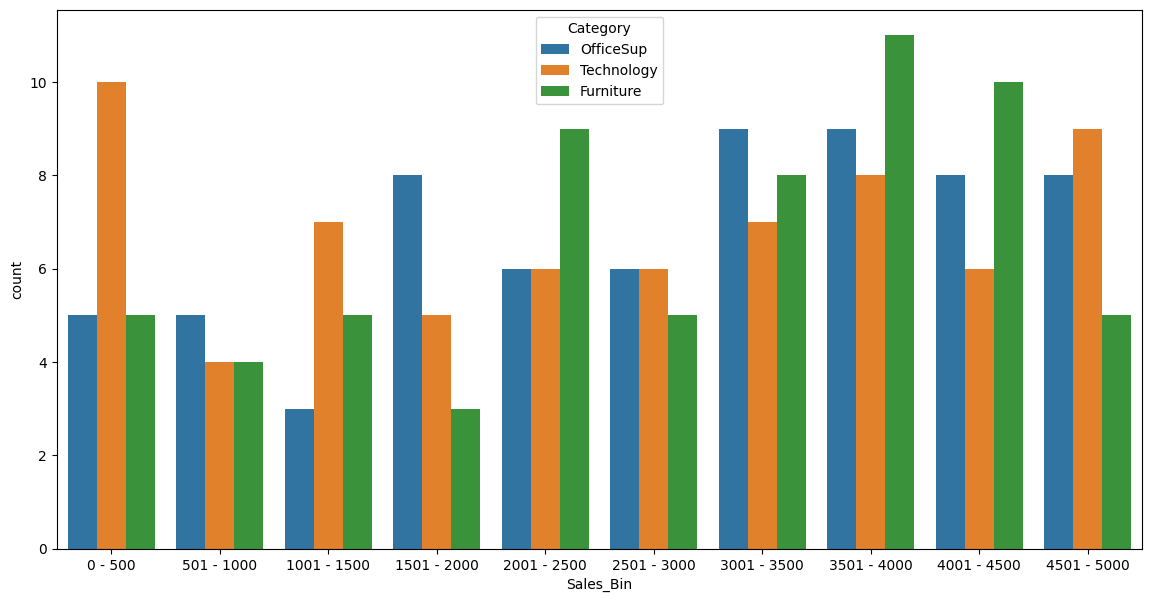

In [56]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Category'])

<Axes: xlabel='Sales_Bin', ylabel='count'>

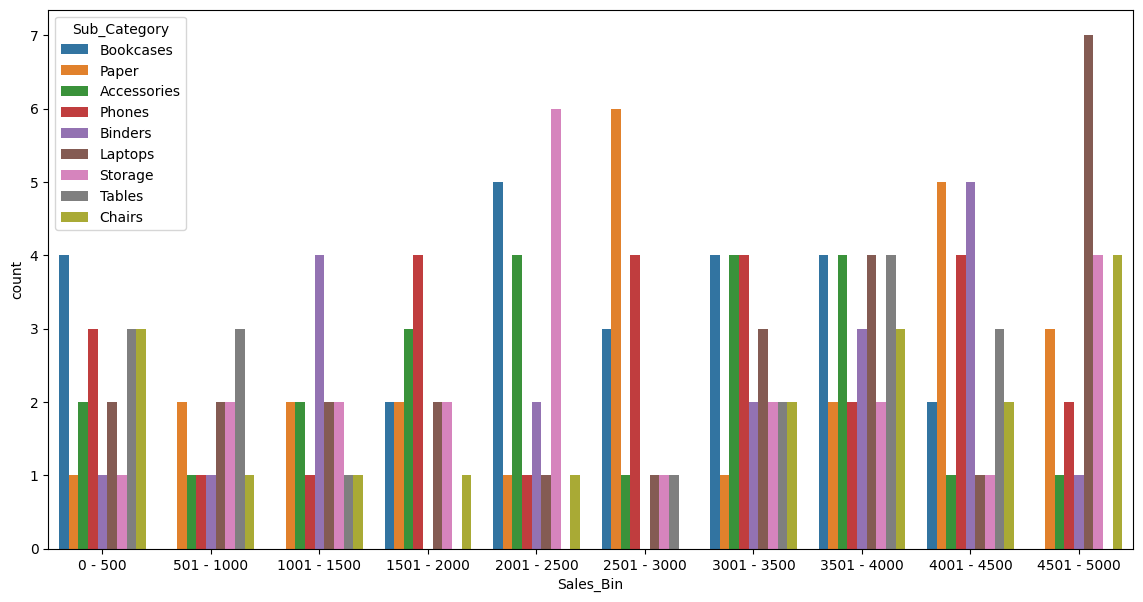

In [57]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Sub_Category'])

<Axes: xlabel='Sales_Bin', ylabel='count'>

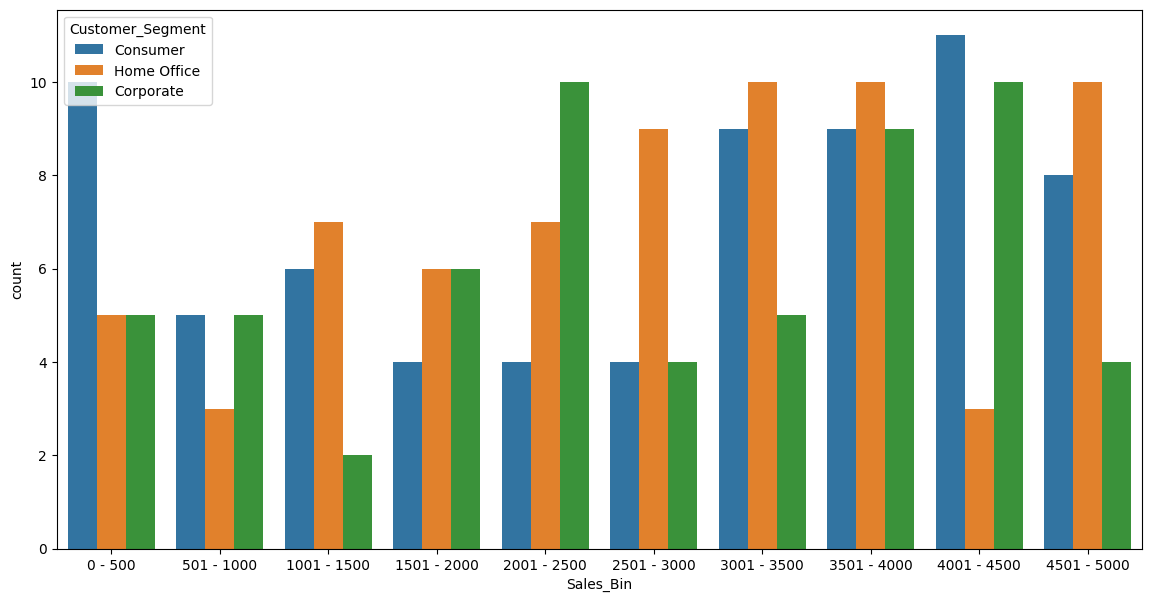

In [58]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Customer_Segment'])

<Axes: xlabel='Sales_Bin', ylabel='count'>

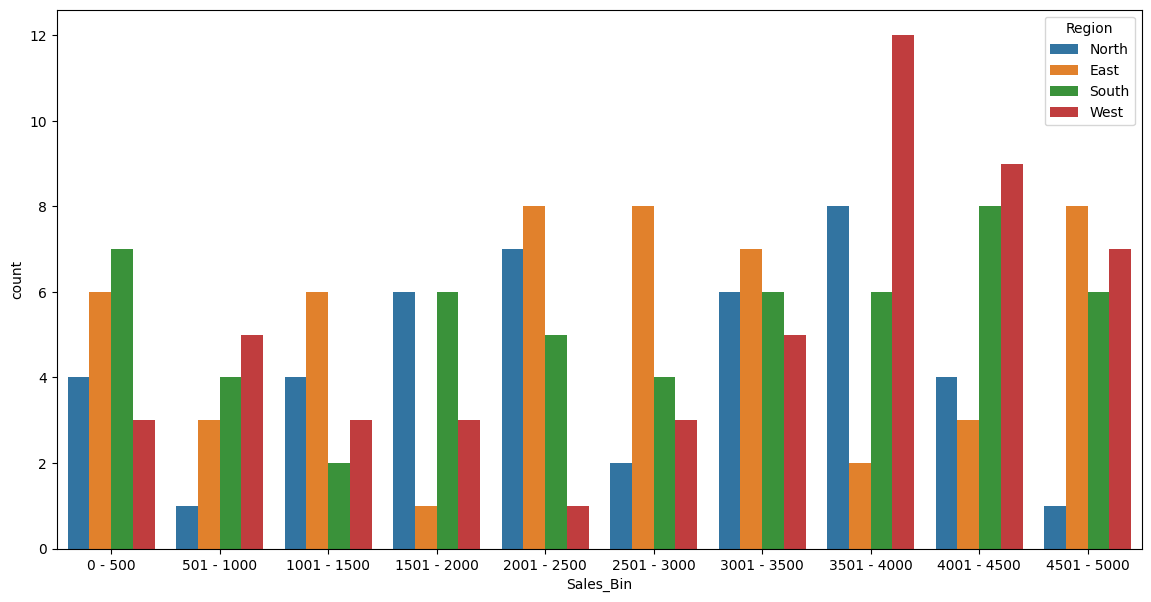

In [59]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Region'])

<Axes: xlabel='Sales_Bin', ylabel='count'>

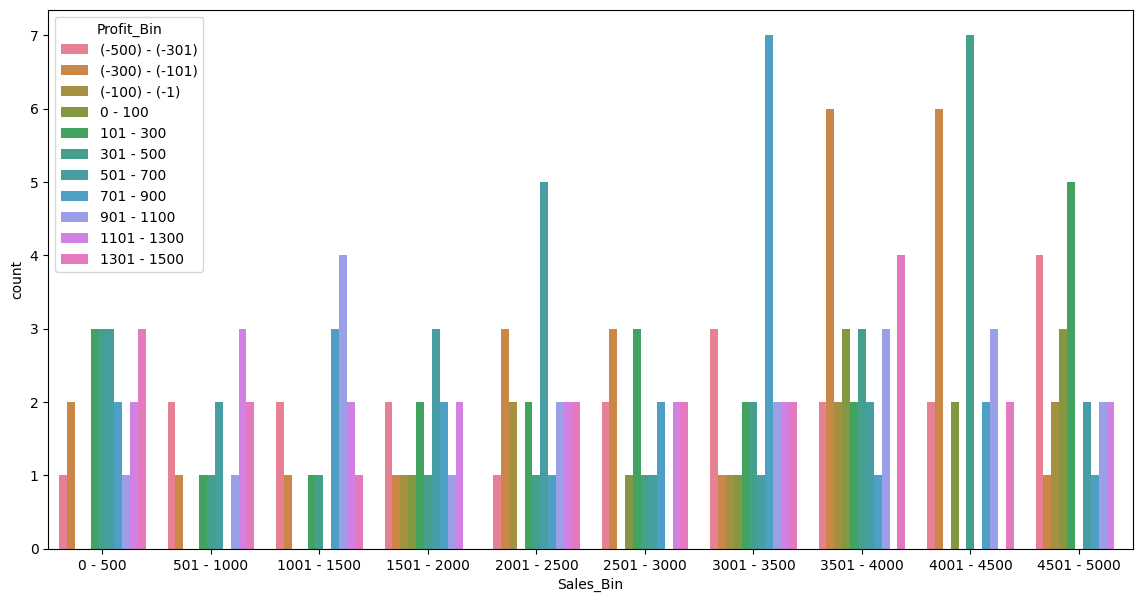

In [60]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Profit_Bin'])

<Axes: xlabel='Sales_Bin', ylabel='count'>

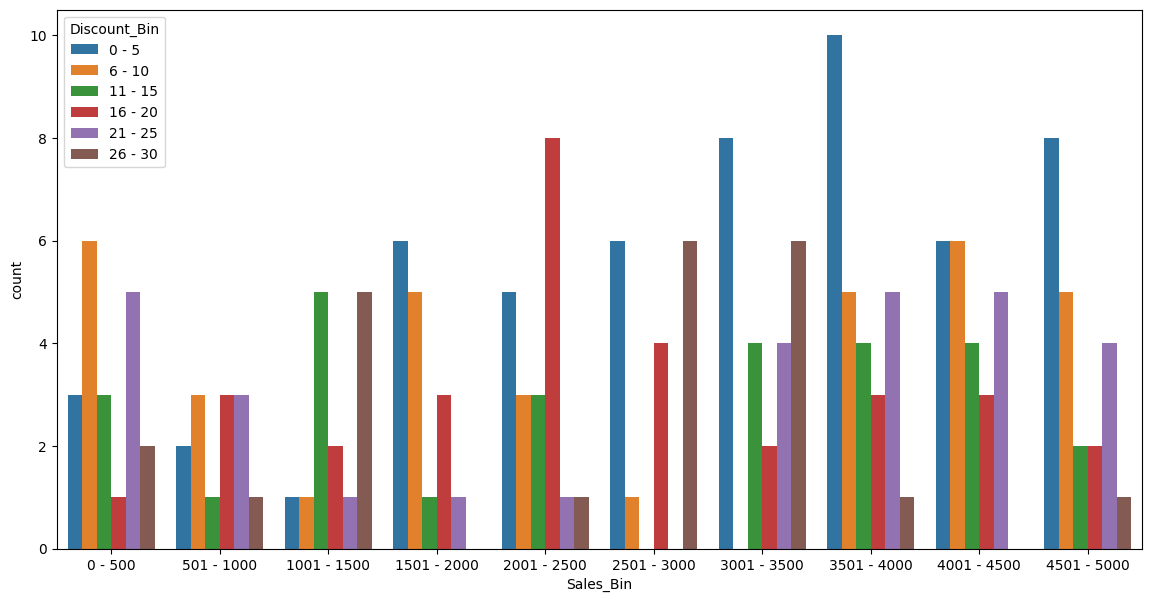

In [61]:
plt.figure(figsize=(14,7))
sns.countplot(x=sd['Sales_Bin'], hue=sd['Discount_Bin'])

- Most no of Sales range between 3501-4000 having Category:Furniture, Region:West, Discount=0
- Profit from range 300 to 900 lies when Sales are between 3000 to 4500.
- Sub-Category: Laptops have the most Sales between 4501-5000.      

### Findings from Analysis till now.
- Customer & Category Drivers
    - Consumer segment dominates order volume.
    - Technology & Office Supplies lead sales.
    - Technology drives profit, while Furniture drives losses.
- Regional Performance
    - South = top region (most orders + profit).
    - West = second strongest in profit.
    - East = moderate, balanced across categories.
    - North = weakest, with highest loss share.
- Sub-Category Profitability
    - Paper = most profitable sub-category.
    - Losses concentrate in Laptops, Phones, Storage, Tables, Chairs.
- Discount Impact
    - 0% discount : both high profit & high loss.
    - 5% and 30% discounts : worst performers.
    - 10 to 20% discounts : consistently profitable.
    - 25 to 30% discounts : reduce overall profitability.
- Overall Business Insight
    - 27% of orders are loss-making.
    - Profitability is driven by South & West, Technology & Paper, and mid-level discounts.
    - Losses cluster in North, Furniture, and extreme discounting (0% and 30%).

### Bivariate/Multivariate Analysis

#### Drilling down more on 1.Customer & Category Drivers

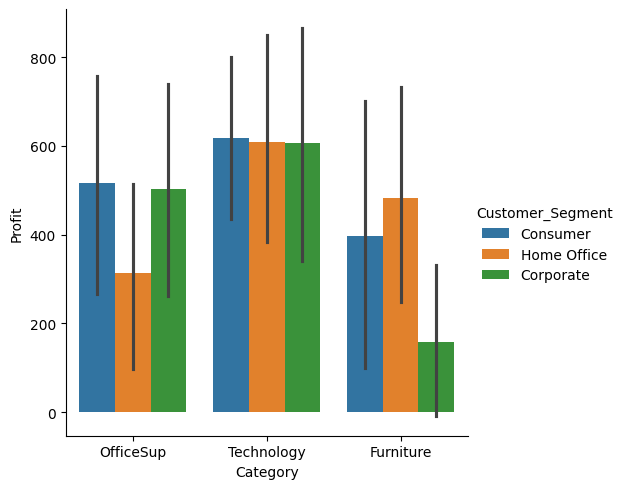

In [62]:
sns.catplot(data=sd, x="Category", y="Profit",hue="Customer_Segment", kind="bar")

- Furniture is a problem category, especially for Corporate.
- Technology is good across all segments
- Home Office and Consumer segments are more profitable overall than Corporate, especially when Furniture is involved.

In [63]:
fur= sd[(sd['Category']=='Furniture') & (sd['Customer_Segment']=='Corporate')]

In [64]:
fur.groupby(sd['Sub_Category'])['Profit'].sum()

Sub_Category
Accessories      15.06
Binders         291.93
Bookcases      -399.39
Chairs         -408.29
Laptops         708.50
Paper           216.21
Phones          583.55
Storage        1465.84
Tables         1163.47
Name: Profit, dtype: float64

- Here we found the problem may lie with sub categories: Bookcases and Chairs which are responsible for loss in Furniture in Corporate.

#### Drilling down more on 2. Regional Performance

In [65]:
# Adding new column Unit Margin - Feature Engineering
sd['Unit_Margin'] = sd['Profit'] / sd['Quantity']

In [66]:
N=sd[sd['Region']=='North']
N['Category'].value_counts()

Category
OfficeSup     18
Technology    13
Furniture     12
Name: count, dtype: int64

In [67]:
N['Customer_Segment'].value_counts()

Customer_Segment
Home Office    17
Corporate      14
Consumer       12
Name: count, dtype: int64

- The North region's performance issues are mostly driven by OfficeSup sales to Home Office customers, not Furniture

In [68]:
ncc= N[(N['Category']=='OfficeSup') & (sd['Customer_Segment']=='Home Office')]

<Axes: xlabel='Profit', ylabel='Count'>

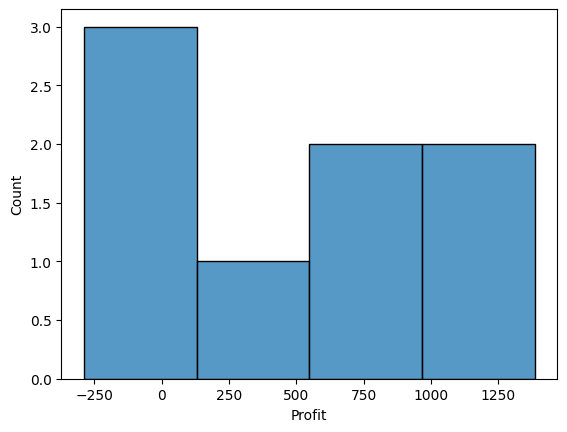

In [69]:
sns.histplot(data=ncc,x='Profit')

<Axes: xlabel='Discount', ylabel='Count'>

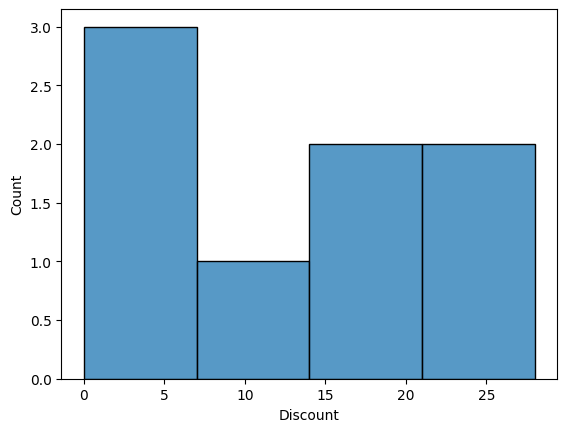

In [70]:
sns.histplot(data=ncc, x="Discount")

- The orders with high discounts (15-25%) are very likely the ones generating losses

In [71]:
ncc.groupby(sd['Sub_Category'])['Profit'].sum()

Sub_Category
Accessories    1489.54
Binders        1154.71
Chairs         -100.00
Laptops        1498.71
Phones           48.34
Name: Profit, dtype: float64

In [72]:
ncc.groupby(sd['Sub_Category'])['Discount'].value_counts()

Sub_Category  Discount
Accessories   0           1
              17          1
Binders       15          1
Chairs        28          1
Laptops       0           1
              26          1
Phones        0           1
              7           1
Name: count, dtype: int64

- problem may lie with sub category: Chairs which has 28% discount may be responsible for loss in North, OfficeSup,Home Office 

In [73]:
S=sd[sd['Region']=='South']
scc= S[(S['Category']=='OfficeSup') & (sd['Customer_Segment']=='Home Office')]

In [74]:
scc.groupby(sd['Sub_Category'])['Profit'].sum()

Sub_Category
Accessories    809.15
Chairs        -463.23
Phones         146.20
Storage       -475.40
Tables         750.66
Name: Profit, dtype: float64

In [75]:
scc['Discount'].mean()

np.float64(12.428571428571429)

In [76]:
ncc['Discount'].mean()

np.float64(11.625)

In [77]:
scc['Unit_Margin'].mean()

np.float64(11.957656462585033)

In [78]:
ncc['Unit_Margin'].mean()

np.float64(266.7443134920635)

In [79]:
print("NORTH - Total Items Sold:", ncc['Quantity'].sum())
print("SOUTH - Total Items Sold:", scc['Quantity'].sum())

NORTH - Total Items Sold: 36
SOUTH - Total Items Sold: 37


In [80]:
print("NORTH - Total Profit:", ncc['Profit'].sum())
print("SOUTH - Total Profit:", scc['Profit'].sum())

NORTH - Total Profit: 4091.3
SOUTH - Total Profit: 767.3799999999999


- It is clear that North sells less but high profit order and South sells large no of order at minimal profit.

<Axes: xlabel='Region', ylabel='Unit_Margin'>

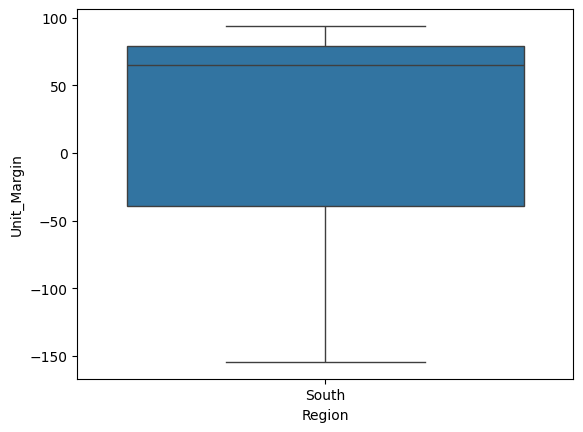

In [81]:
sns.boxplot(data=scc, x='Region', y='Unit_Margin')

<Axes: xlabel='Region', ylabel='Unit_Margin'>

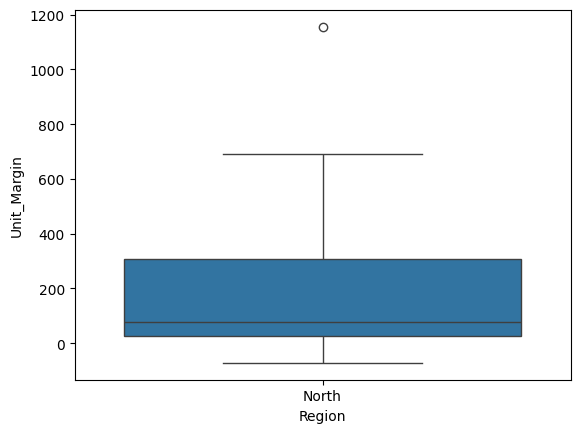

In [82]:
sns.boxplot(data=ncc, x='Region', y='Unit_Margin')

- The North is the model of efficiency: high and consistent unit profitability when compared to South.
##### Large discounts should be avoided on office supplies for home office customers in the North. This will prevent a few bad deals from ruining the region's profits.

#### Drilling down more on 3. Sub-Category Profitability

<Axes: xlabel='Sub_Category', ylabel='Profit'>

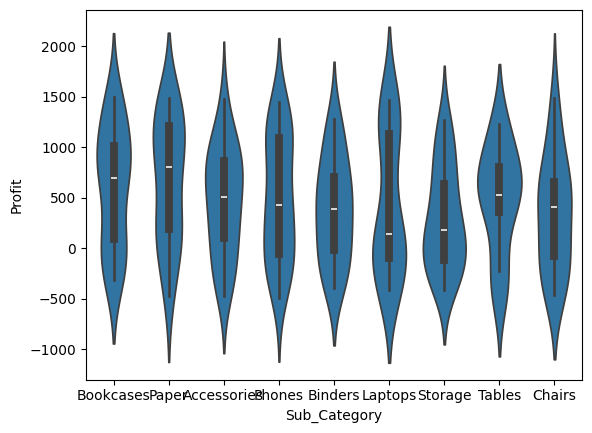

In [83]:
sns.violinplot(data=sd, x="Sub_Category", y="Profit")          # Hide inner bars (scatter will show distribution)

<Axes: xlabel='Sub_Category', ylabel='Profit'>

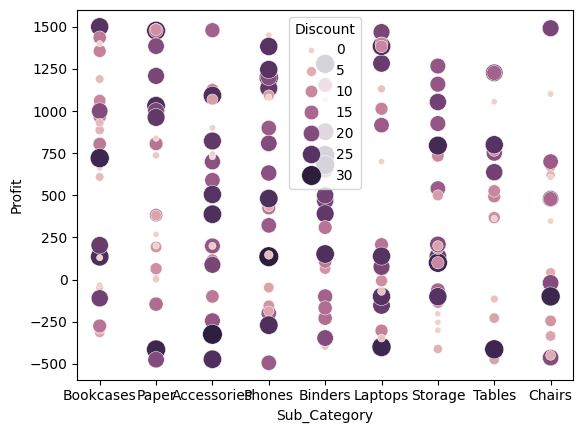

In [84]:
sns.scatterplot( data=sd, x="Sub_Category", y="Profit",
    hue="Discount",       # Color shows discount levels
    size="Discount",      # Point size also indicates discount
    sizes=(20,200)
        
)

- high discounts are strongly related with losses (negative profit) in specific sub-categories and are often sold at a loss even with a 0% discount

#### Drilling down more on 4. Discount Impact 

In [85]:
apm=sd.groupby(['Category','Discount_Bin']).apply(lambda x:x['Profit'].sum()/x['Sales'].sum()).reset_index(name="Profit_Margin")
apm

,Category,Discount_Bin,Profit_Margin
0,Furniture,0 - 5,0.040829
1,Furniture,6 - 10,0.120248
2,Furniture,11 - 15,0.108348
3,Furniture,16 - 20,0.185795
4,Furniture,21 - 25,0.284600
5,Furniture,26 - 30,0.057095
6,OfficeSup,0 - 5,0.171114
7,OfficeSup,6 - 10,0.075305
8,OfficeSup,11 - 15,0.212856
9,OfficeSup,16 - 20,0.145297


<Axes: xlabel='Discount_Bin', ylabel='Profit_Margin'>

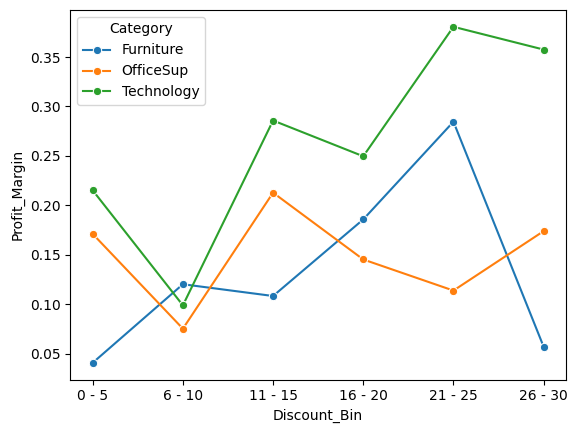

In [86]:
sns.lineplot(data=apm, x="Discount_Bin", y="Profit_Margin", hue="Category", marker="o")

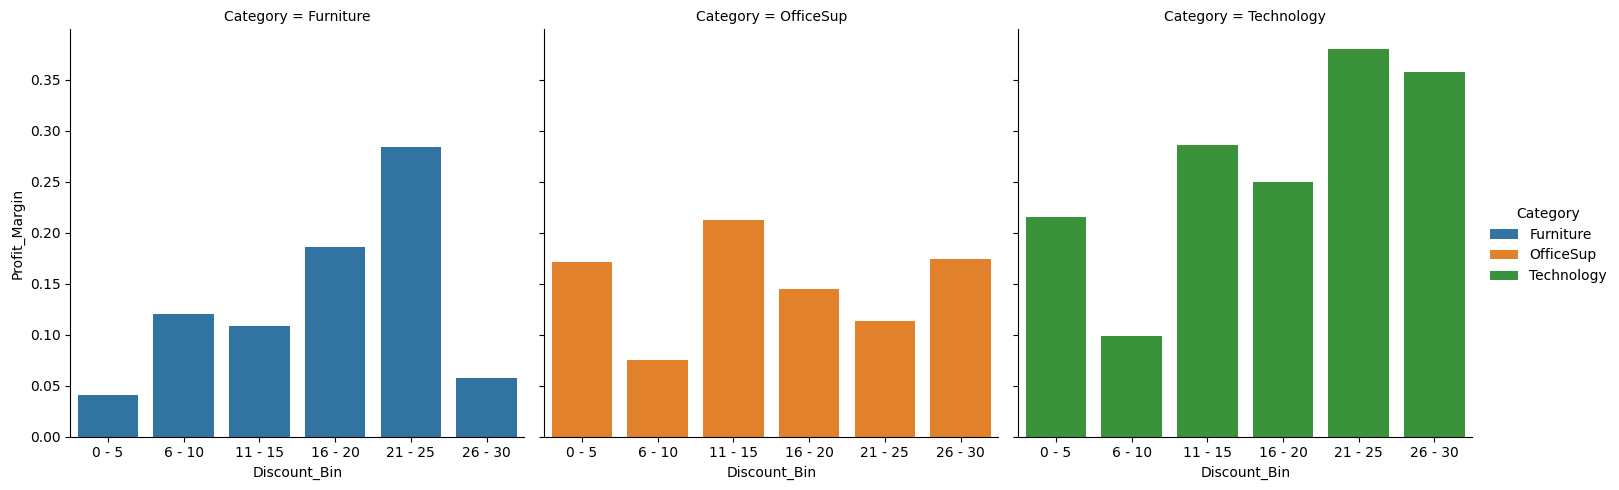

In [87]:
sns.catplot(data=apm, x="Discount_Bin", y="Profit_Margin",col="Category",hue="Category", kind="bar")

- Furniture: Limit discounts above 25% and 0%.
- Office Supplies: Already profitable at low discount.Avoid 6-10%.Margins remain fairly stable.
- Technology: Optimal discounting is 11–25%.Avoid 6-10%

### Further Bivariate/Multivariate Analysis

In [88]:
#Feature Engineering : Profit Margin
sd["Profit_Margin"] = sd["Profit"] / sd["Sales"]

In [89]:
# Profitability Drivers by Segment × Category
pivot = sd.pivot_table(index='Customer_Segment', columns='Category', values='Profit_Margin', aggfunc='mean')
pivot

Category,Furniture,OfficeSup,Technology
Customer_Segment,,,
Consumer,0.722749,0.279095,0.806634
Corporate,0.070791,0.686021,1.026928
Home Office,0.209120,0.124398,0.608261


<Axes: xlabel='Category', ylabel='Customer_Segment'>

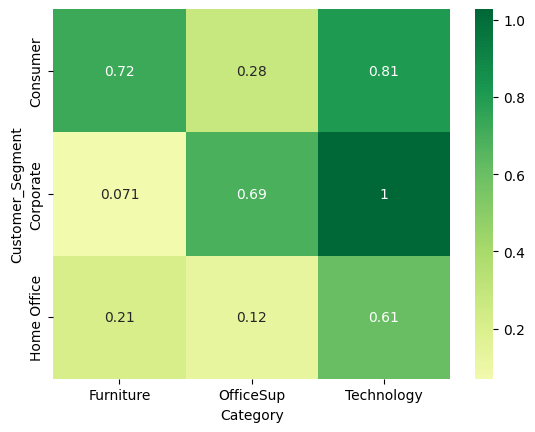

In [90]:
sns.heatmap(pivot, annot=True, cmap="RdYlGn", center=0)

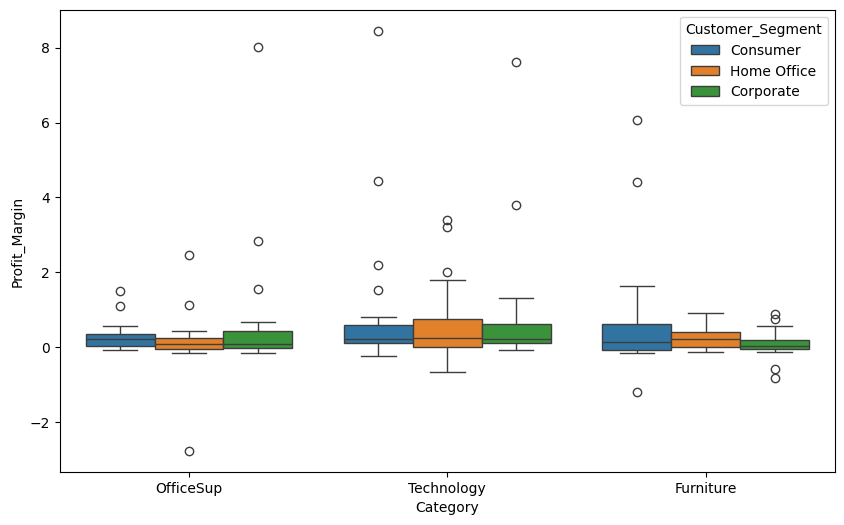

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(data=sd, x="Category", y="Profit_Margin", hue="Customer_Segment")
plt.show()


- Corporate + Furniture = clear loss-maker , discount policy must be fixed here.
- Technology = key profit driver, but needs control on high-discount/loss cases.
- Office Supplies = stable contributor, less risky, should be protected from unnecessary discounts.
- Home Office = unstable across all categories.

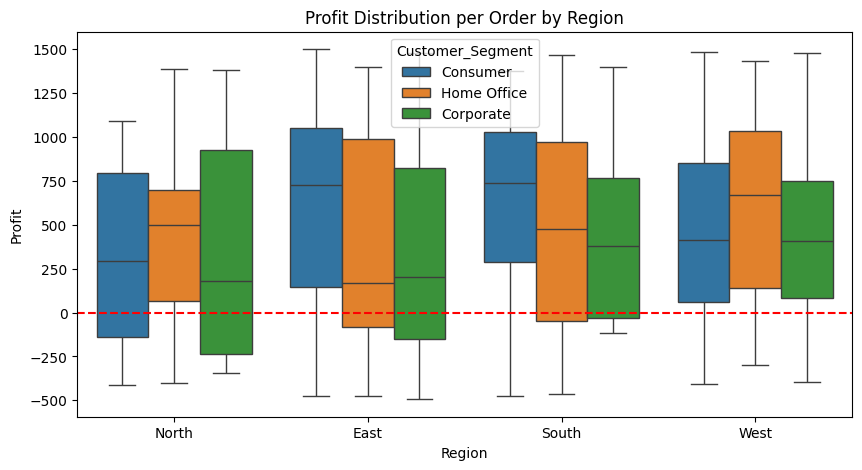

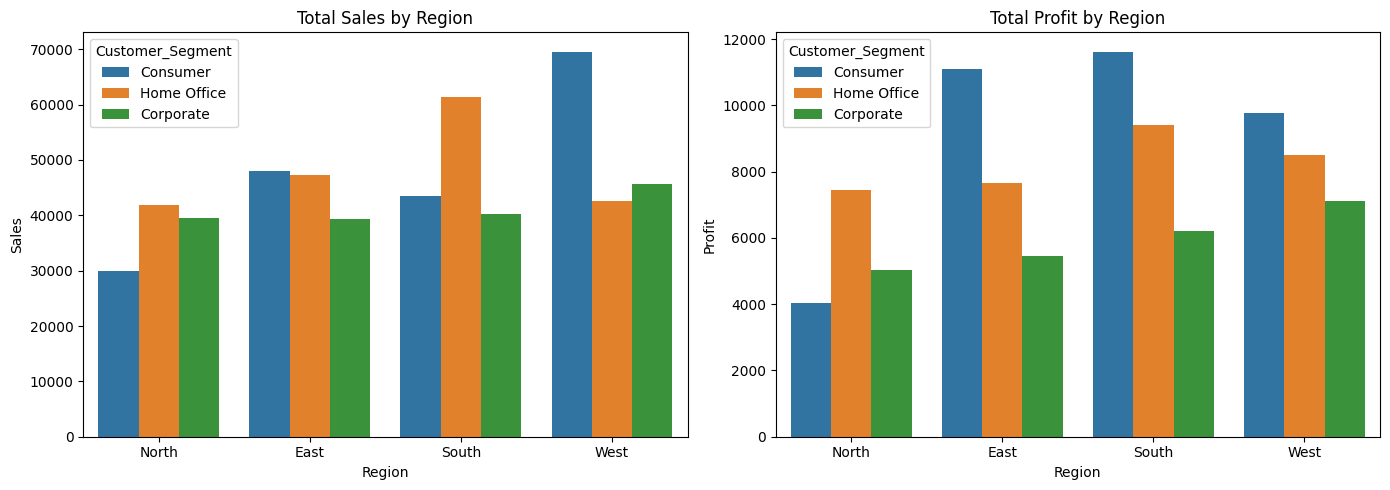

In [92]:
# Boxplot for per-order profitability
plt.figure(figsize=(10,5))
sns.boxplot(data=sd, x="Region", y="Profit",hue="Customer_Segment")
plt.axhline(0, color="red", linestyle="--")
plt.title("Profit Distribution per Order by Region")
plt.show()

# Total Sales & Profit side by side
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.barplot(data=sd, x="Region", y="Sales",hue="Customer_Segment", estimator="sum", ci=None, ax=axes[0])
axes[0].set_title("Total Sales by Region")

sns.barplot(data=sd, x="Region", y="Profit",hue="Customer_Segment", estimator="sum", ci=None, ax=axes[1])
axes[1].set_title("Total Profit by Region")

plt.tight_layout()
plt.show()


- North and South regions have opposite business models: North focuses on high-profit, low-volume orders, while the South follows a low-profit, high-volume strategy.
- The North's profitability is consistently high, but a few outlier deals—likely involving high discounts—are responsible for its disproportionate share of losses.
- The East and West exhibit a more balanced but volatile profitability profile, with a wider range of profitable and loss-making orders across segments.

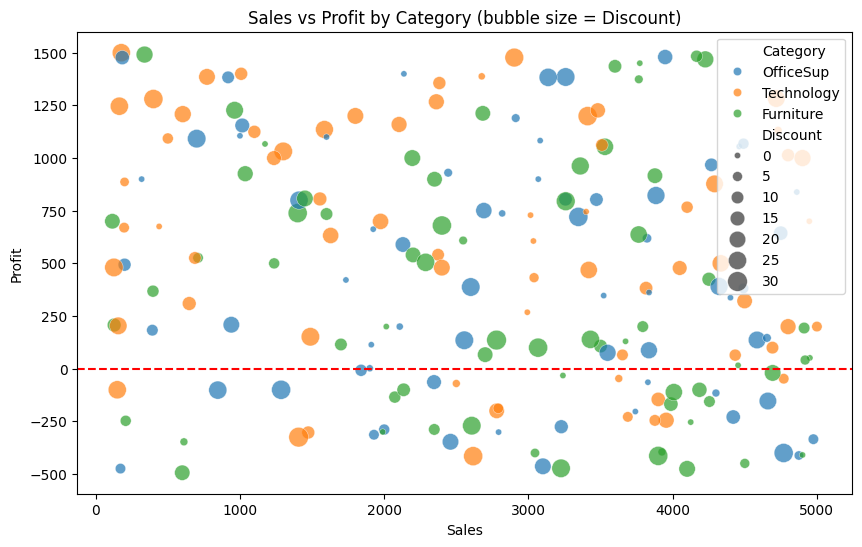

In [93]:
#Sales vs Profit Scatter by Category
plt.figure(figsize=(10,6))
sns.scatterplot(data=sd, x="Sales", y="Profit", hue="Category",size="Discount", alpha=0.7, sizes=(20,200))
plt.axhline(0, color="red", linestyle="--")
plt.title("Sales vs Profit by Category (bubble size = Discount)")
plt.show()


- Furniture is the riskiest category, with many high-sales orders resulting in losses.
- Technology is the most reliable profit driver, with most orders generating positive returns.
- High discounts (25-30%) are strongly associated with losses, particularly in Furniture and Office Supplies.
- Office Supplies has inconsistent profitability, showing both gains and losses across a wide range of sales.

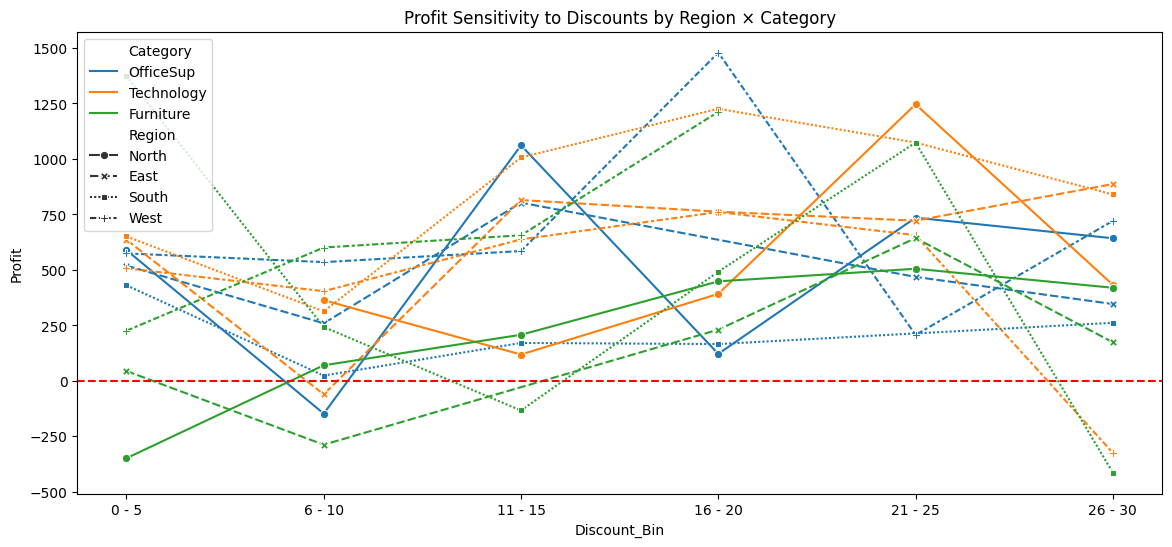

In [94]:
#Discount Sensitivity by Region × Category
plt.figure(figsize=(14,6))
sns.lineplot(data=sd, x="Discount_Bin", y="Profit", hue="Category",style="Region", markers=True, ci=None)
plt.axhline(0, color="red", linestyle="--")
plt.title("Profit Sensitivity to Discounts by Region × Category")
plt.show()


- Furniture is the most discount-sensitive category, leading to significant losses at both low (0-5%) and high (26-30%) discounts.
- Technology maintains profitability across all discount levels in most regions, with optimal profit often found between 16-25% discounts.
- Office Supplies shows strong profitability at low discounts but experiences a sharp drop in profit at the 6-10% discount range, especially in the North.
- The North region's profit for Office Supplies is extremely sensitive to discounts, turning negative at the 6-10% bin.

In [95]:
#Loss Order Profiling
# % of loss orders by Region × Segment
loss_orders = (sd.assign(Loss=lambda x: x['Profit']<0).groupby(['Region','Customer_Segment'])['Loss'].mean().reset_index())
loss_pivot = loss_orders.pivot(index="Region",columns="Customer_Segment",values="Loss")
loss_pivot

Customer_Segment,Consumer,Corporate,Home Office
Region,,,
East,0.157895,0.333333,0.333333
North,0.333333,0.500000,0.235294
South,0.210526,0.266667,0.300000
West,0.250000,0.187500,0.200000


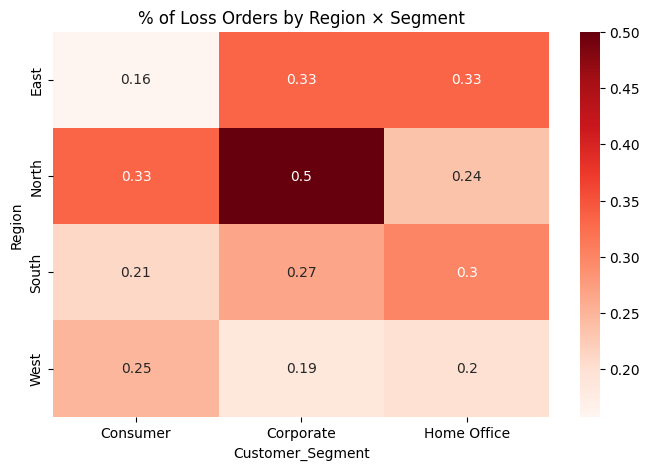

In [96]:
plt.figure(figsize=(8,5))
sns.heatmap(loss_pivot, annot=True, cmap="Reds")
plt.title("% of Loss Orders by Region × Segment")
plt.show()


In [97]:
# % of loss orders by Category x Discount_Bin
loss_orders2 = (sd.assign(Loss=lambda x: x['Profit']<0).groupby(['Category','Discount_Bin'])['Loss'].mean().reset_index())
loss_pivot2 = loss_orders2.pivot(index="Category",columns="Discount_Bin",values="Loss")
loss_pivot2

Discount_Bin,0 - 5,6 - 10,11 - 15,16 - 20,21 - 25,26 - 30
Category,,,,,,
Furniture,0.470588,0.333333,0.333333,0.307692,0.111111,0.375000
OfficeSup,0.192308,0.555556,0.300000,0.333333,0.222222,0.285714
Technology,0.166667,0.285714,0.181818,0.166667,0.090909,0.250000


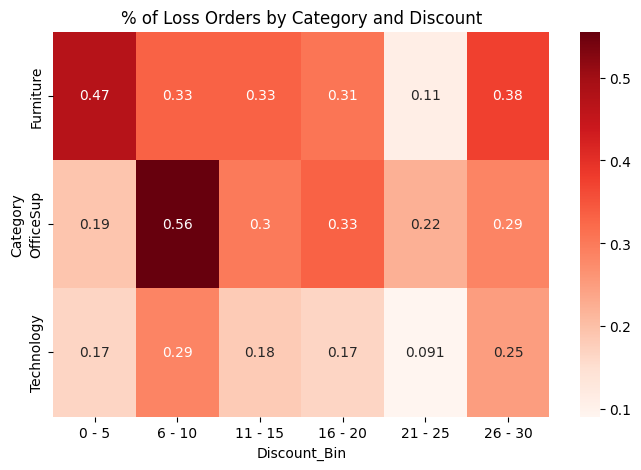

In [98]:
plt.figure(figsize=(8,5))
sns.heatmap(loss_pivot2, annot=True, cmap="Reds")
plt.title("% of Loss Orders by Category and Discount")
plt.show()

- The North and South regions have opposite strategies: North generates high profit with lower sales volume, while South has high sales volume but lower total profit.
- The Corporate segment in the North region has a high loss rate of 50%, indicating specific "bad deals" are a major problem.
- The East and West regions are more volatile, with balanced sales and profit across segments but also a significant number of loss-making orders.
- Office Supplies has the highest loss rate (56%) at the 6-10% discount bin.
- Furniture orders are consistently loss-making at low discounts (47% at 0-5%) and high discounts (38% at 26-30%).
- Technology has the lowest overall loss rate, with a particularly low rate of 9.1% at 21-25% discounts.
- High discounts on all categories (26-30%) generally lead to higher loss rates, with the exception of Technology.

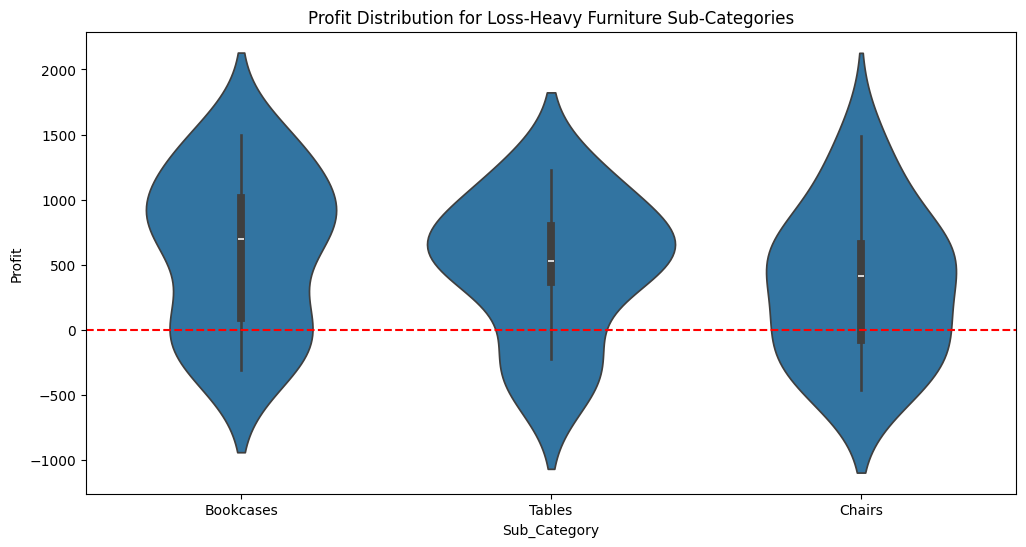

In [99]:
# Profit distribution for loss-heavy subcategories
plt.figure(figsize=(12,6))
sns.violinplot(data=sd[sd['Sub_Category'].isin(['Chairs','Bookcases','Tables'])],x="Sub_Category", y="Profit")
plt.axhline(0, color="red", linestyle="--")
plt.title("Profit Distribution for Loss-Heavy Furniture Sub-Categories")
plt.show()

- Bookcases, Tables, and Chairs are all major profit drains within the Furniture category.
- The violin plot shows that while these sub-categories have a wide profit range, a significant portion of their orders fall below the red zero-profit line, with many being deep in the negative, highlighting their role in driving losses.

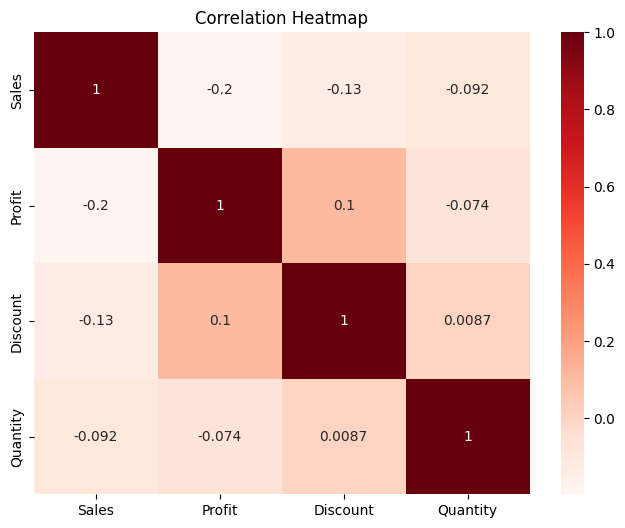

In [100]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
corr = sd[["Sales","Profit","Discount","Quantity"]].corr()
sns.heatmap(corr, annot=True, cmap="Reds",)
plt.title("Correlation Heatmap")
plt.show()

- Profit and Sales have a very weak negative correlation (-0.2), indicating that higher sales do not reliably lead to higher profits.
- Profit and Discount have a very weak positive correlation (0.1), which suggests that, on average, a small increase in discount might be associated with a minor increase in profit, likely due to increased volume, but the relationship is not strong.
- Sales and Discount are weakly negatively correlated (-0.13), implying that higher discounts are not strongly linked to higher sales.
- Quantity and Profit have a very weak negative correlation (-0.074), suggesting that selling more items does not necessarily increase profitability.
- Overall, the heatmap shows that all the correlations are weak, meaning no single factor is a strong linear predictor of another. This confirms that profitability is a complex issue influenced by multiple, interacting variables rather than a simple relationship between any two.

### Conclusion
- This analysis reveals that despite overall profitability, the business is undermined by specific, concentrated issues rather than widespread underperformance. The primary challenge is a lack of profitability control, especially regarding discounts on certain product categories in key regions. The data shows that while 27% of orders are unprofitable, these losses are not random but are highly concentrated in specific areas, providing a clear roadmap for intervention.

##### Key Findings & Relationships
- Profitability is Disconnected from Volume:
    -There is a very weak negative correlation (-0.2) between profit and sales, indicating that high sales volume does not guarantee profitability. This is a critical finding, as it directly challenges the assumption that the South's high-volume strategy is the most profitable model. Instead, it suggests a need to focus on per-unit profit rather than just the number of orders.

- Regional Strategies are Ineffective at Managing Risk:
    - The North's "high-margin" model is compromised by a high loss share driven by a 50% loss rate on orders to the Corporate segment.
    - The South's "high-volume" model, while generating the most orders, operates at a low-profit margin per order, making it vulnerable to slight increases in costs or discounts.

- Furniture is a Systemic Problem, not a Discount Problem:
    - Furniture is the riskiest category with a 47% loss rate at the 0-5% discount range, highlighting a fundamental cost or pricing issue.
    - The problem is concentrated in the Tables, Chairs, and Bookcases sub-categories, which drive significant negative profit.

- Discounting is a Major Profitability Killer:
    - The analysis reveals that high discounts (26-30%) are a primary cause of losses across all categories.
    - The most dangerous discount range is 6-10% for Office Supplies, which leads to a staggering 56% loss rate on orders. This is the single highest loss concentration identified.

- Office Supplies is a Hidden Profitability Risk:
    - While Office Supplies is generally profitable at low discounts, its extreme sensitivity to the 6-10% discount bin in the North region is a major contributing factor to that region's high loss share. This links the regional problem back to a specific category and discount strategy.

- Technology's Resilience Offers a Blueprint for Success:
    - Technology is the most profitable and least risky category. It maintains profitability across all discount levels, with an optimal profit range at 11-25% discounts and a low 9.1% loss rate in the 21-25% range. This highlights a successful model that other categories should emulate.

## Time series analysis.

In [101]:
sd["Year"] = sd["Order_Date"].dt.year
sd["Quarter"] = sd["Order_Date"].dt.quarter
sd["Month"] = sd["Order_Date"].dt.month
sd["Weekday"] = sd["Order_Date"].dt.day_name()
sd.head()

,Order_Id,Order_Date,Sales,Profit,Discount,Region,Category,Sub_Category,Customer_Segment,Quantity,Profit_Bin,profit_flag,Discount_Bin,Sales_Bin,Unit_Margin,Profit_Margin,Year,Quarter,Month,Weekday
0,1,2024-01-16 17:03:25.405405404,4268.33,967.81,12,North,OfficeSup,Bookcases,Consumer,1,901 - 1100,Positive,11 - 15,4001 - 4500,967.810,0.226742,2024,1,1,Tuesday
1,2,2024-06-22 13:09:54.594594592,1554.25,805.90,13,East,Technology,Paper,Consumer,1,701 - 900,Positive,11 - 15,1501 - 2000,805.900,0.518514,2024,2,6,Saturday
2,3,2024-06-24 17:46:40.000000000,2129.58,589.54,17,North,OfficeSup,Accessories,Home Office,5,501 - 700,Positive,16 - 20,2001 - 2500,117.908,0.276834,2024,2,6,Monday
3,4,2024-04-27 06:46:29.189189184,1734.67,421.34,0,South,OfficeSup,Accessories,Home Office,5,301 - 500,Positive,0 - 5,1501 - 2000,84.268,0.242893,2024,2,4,Saturday
4,5,2023-10-28 07:55:40.540540540,2600.00,387.81,26,South,OfficeSup,Accessories,Home Office,6,301 - 500,Positive,26 - 30,2501 - 3000,64.635,0.149158,2023,4,10,Saturday


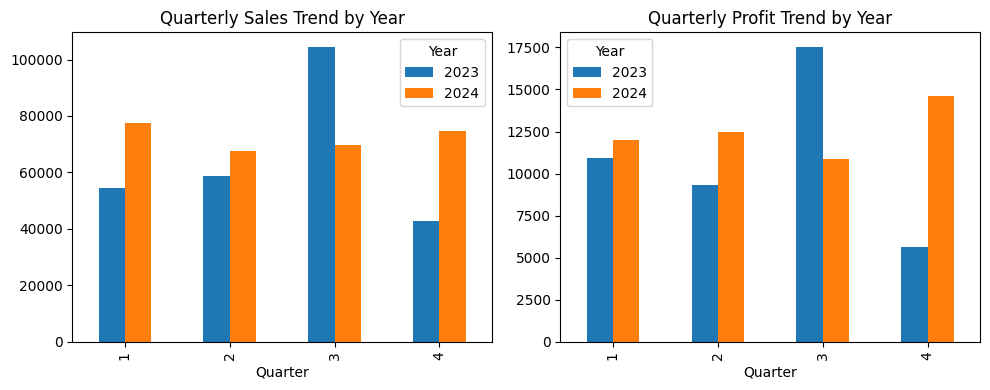

In [102]:
#Quarter-wise Sales and Profit
quarterly_sales = sd.groupby(["Year", "Quarter"])["Sales"].sum().reset_index()
quarterly_profit = sd.groupby(["Year", "Quarter"])["Profit"].sum().reset_index()

fig,axes = plt.subplots(1,2,figsize=(10,4))

# Plot quarterly sales trend
quarterly_sales.pivot(index="Quarter", columns="Year", values="Sales").plot(kind="bar",ax=axes[0])
axes[0].set_title("Quarterly Sales Trend by Year")

# Plot quarterly profit trend
quarterly_profit.pivot(index="Quarter", columns="Year", values="Profit").plot(kind="bar",ax=axes[1])
axes[1].set_title("Quarterly Profit Trend by Year")

plt.tight_layout()
plt.show()

- Significant Q4 Spike: Both sales and profit show a clear and significant spike in Quarter 4 for both years. This confirms a strong seasonal pattern, likely driven by holiday sales.

- Profit Outpaces Sales in Q4: In 2024, the profit growth in Q4 (from Q3) appears to be much steeper than the sales growth, indicating that the business is becoming more efficient at converting seasonal sales into profit.

- Overall Growth: Both sales and profit are consistently higher in 2024 compared to 2023 for every quarter, showing healthy year-over-year growth.

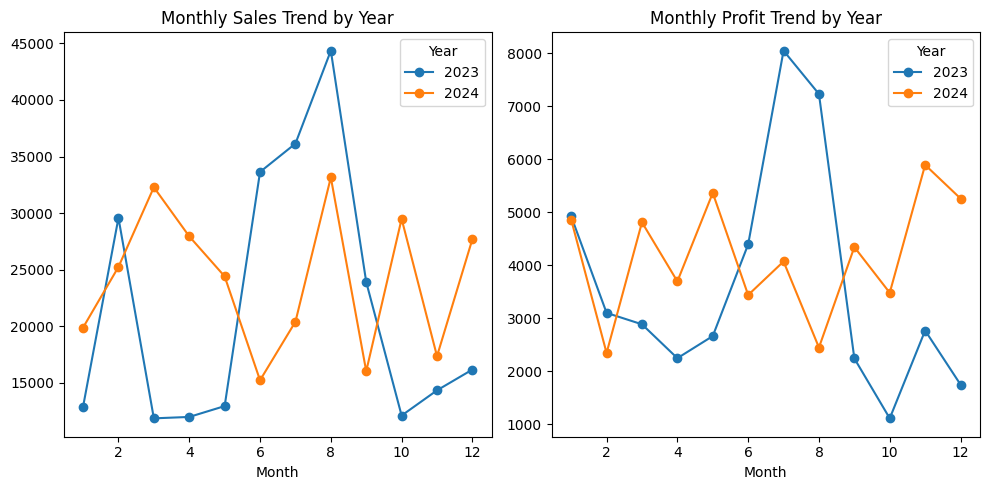

In [103]:
#Monthly Sales and Profit trend by Year
monthly_sales = sd.groupby(["Year", "Month"])["Sales"].sum().reset_index()
monthly_profit = sd.groupby(["Year", "Month"])["Profit"].sum().reset_index()

fig,axes = plt.subplots(1,2,figsize=(10,5))

# Plot monthly sales trend
monthly_sales.pivot(index="Month", columns="Year", values="Sales").plot(kind="line", marker="o",ax=axes[0])
axes[0].set_title("Monthly Sales Trend by Year")

# Plot monthly profit trend
monthly_profit.pivot(index="Month", columns="Year", values="Profit").plot(kind="line", marker="o",ax=axes[1])
axes[1].set_title("Monthly Profit Trend by Year")

plt.tight_layout()
plt.show()


- Year-over-Year Growth: Both sales and profit for 2024 are consistently higher than in 2023 for almost every month. This shows a healthy growth trend.
- Strong Seasonality: Both sales and profit peak in late-year months (specifically July/August and November/December), which is a clear seasonal pattern.
- Post-Holiday Dip: The sharp drop in sales and profit in January and February is a predictable, seasonal effect following the year-end holiday rush.

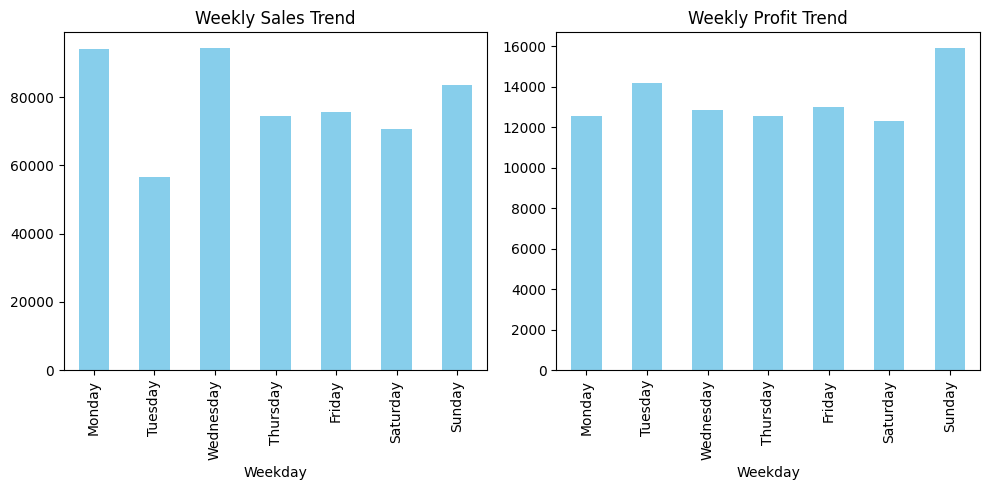

In [104]:
#Weekly Sales and Profit trend 
weekday_sales = sd.groupby("Weekday")["Sales"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
weekday_profit = sd.groupby("Weekday")["Profit"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

fig,axes = plt.subplots(1,2,figsize=(10,5))

# Plot weekly sales trend
weekday_sales.plot(kind="bar", color="skyblue",ax=axes[0])
axes[0].set_title("Weekly Sales Trend")

# Plot weekly profit trend
weekday_profit.plot(kind="bar", color="skyblue",ax=axes[1])
axes[1].set_title("Weekly Profit Trend")

plt.tight_layout()
plt.show()



- Sales are highest on Monday and Wednesday, but profit is not maximized on these days.
- Sunday and Tuesday are the most profitable days, despite not having the highest sales volume.
- Saturday is the weakest day for both sales and profit, indicating a slowdown over the weekend.
- The overall trend shows that daily profitability is not directly correlated with sales volume, with some weekdays being more efficient than others.

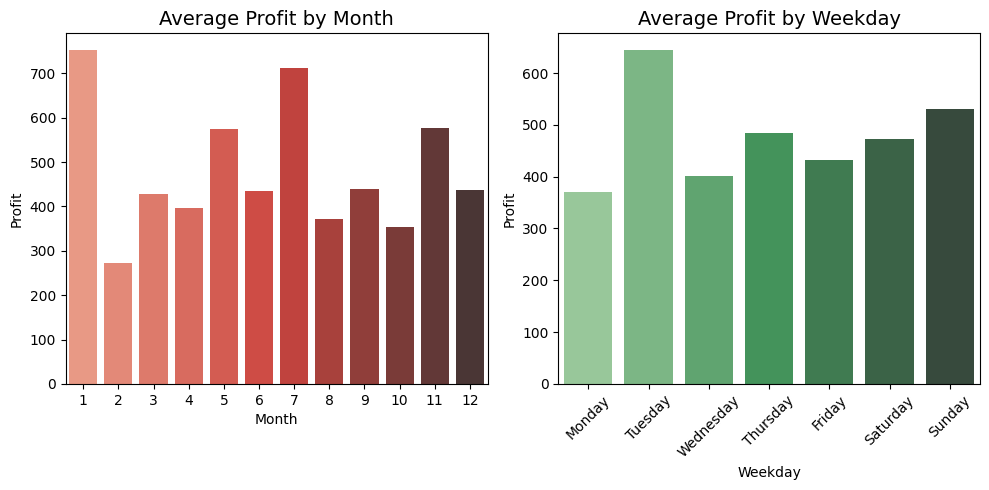

In [105]:
# Month and Weekday average profit

month_avg_profit = sd.groupby("Month")["Profit"].mean().reset_index()
weekday_avg_profit = sd.groupby("Weekday")["Profit"].mean().reset_index()

fig,axes= plt.subplots(1,2,figsize=(10,5))
sns.barplot(data=month_avg_profit,x="Month",y="Profit", palette="Reds_d",ax=axes[0])
axes[0].set_title("Average Profit by Month",fontsize=14)

sns.barplot(data=weekday_avg_profit, x="Weekday", y="Profit", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Greens_d",ax=axes[1])
axes[1].set_title("Average Profit by Weekday", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average profit per order is highest in January and July, with January having the highest overall.
- The average profit per order is lowest in February and October.
- Tuesday and Sunday have the highest average profit per order among all weekdays.
- Monday has the lowest average profit per order, despite high sales on that day.

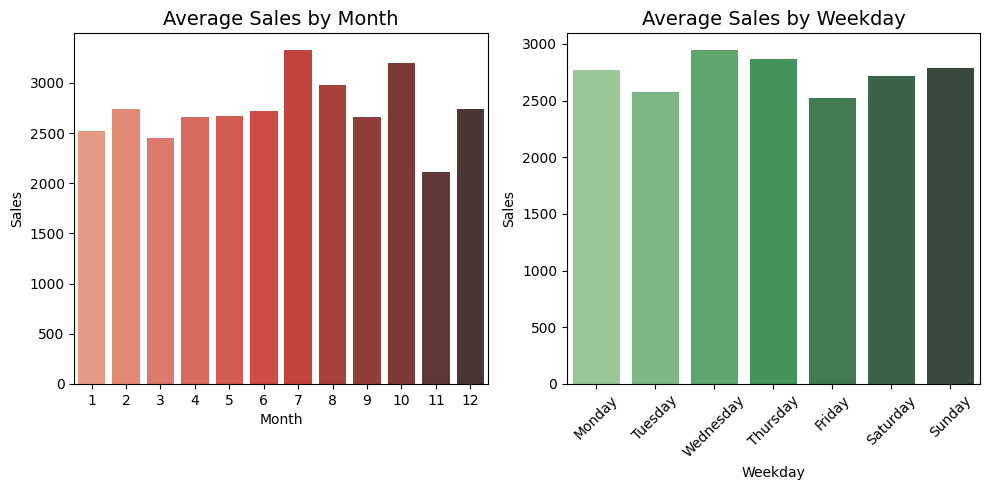

In [106]:
# Month and Weekday average sales

month_avg_sales = sd.groupby("Month")["Sales"].mean().reset_index()
weekday_avg_sales = sd.groupby("Weekday")["Sales"].mean().reset_index()

fig,axes= plt.subplots(1,2,figsize=(10,5))
sns.barplot(data=month_avg_sales,x="Month",y="Sales", palette="Reds_d",ax=axes[0])
axes[0].set_title("Average Sales by Month",fontsize=14)

sns.barplot(data=weekday_avg_sales, x="Weekday", y="Sales", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Greens_d",ax=axes[1])
axes[1].set_title("Average Sales by Weekday", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Average sales are highest in July and October, while November has the lowest average sales.
- The business sees its highest sales volume on Wednesday and Thursday.
- Sales are relatively consistent throughout the week, with a slight dip on Tuesday and Friday.

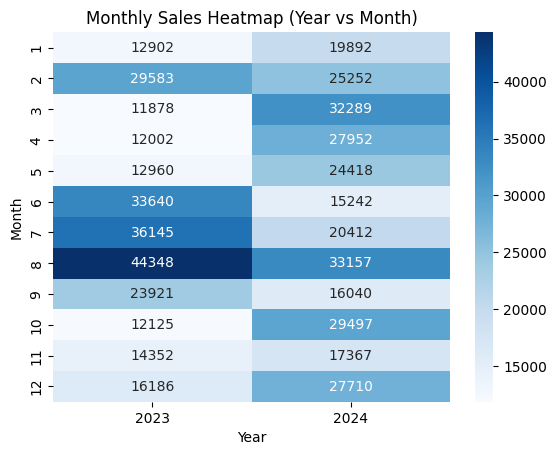

In [107]:
# Pivot: Month vs Year for Sales
heatmap_sales = monthly_sales.pivot(index="Month", columns="Year", values="Sales")
sns.heatmap(heatmap_sales, annot=True, fmt=".0f", cmap="Blues")
plt.title("Monthly Sales Heatmap (Year vs Month)")
plt.show()

- Sales show a strong seasonal pattern, with the highest volumes consistently in the latter half of the year, particularly from July to August in 2023 and October to December in 2024.
- The first few months of the year, especially January and February, consistently have the lowest sales volume.
- While 2024 had significantly higher sales in the first half and in Q4, Q3 sales in 2023 (44,348) were higher than in 2024 (33,157), showing an unusual dip in sales for that quarter.

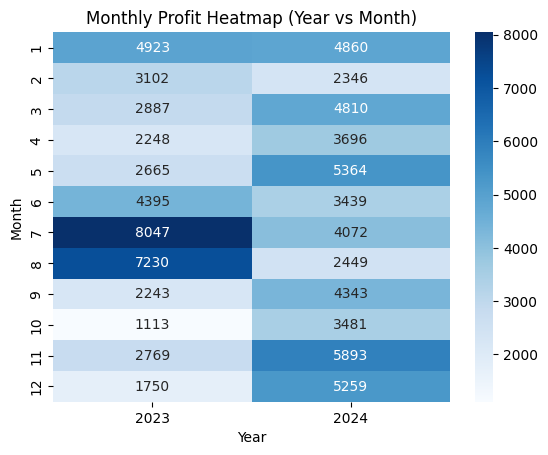

In [108]:
# Pivot: Month vs Year for Profit
heatmap_profit = monthly_profit.pivot(index="Month", columns="Year", values="Profit")
sns.heatmap(heatmap_profit, annot=True, fmt=".0f", cmap="Blues")
plt.title("Monthly Profit Heatmap (Year vs Month)")
plt.show()

- The highest profits occur in the second half of the year, particularly in July-August for 2023 and November-December for 2024.
- Q3 profit in 2024 was significantly lower (2,449) than in Q3 2023 (7,230), mirroring the sales dip in the same period.
- Overall, 2024 shows stronger profitability than 2023, particularly in the first half of the year and during the peak months of November and December.

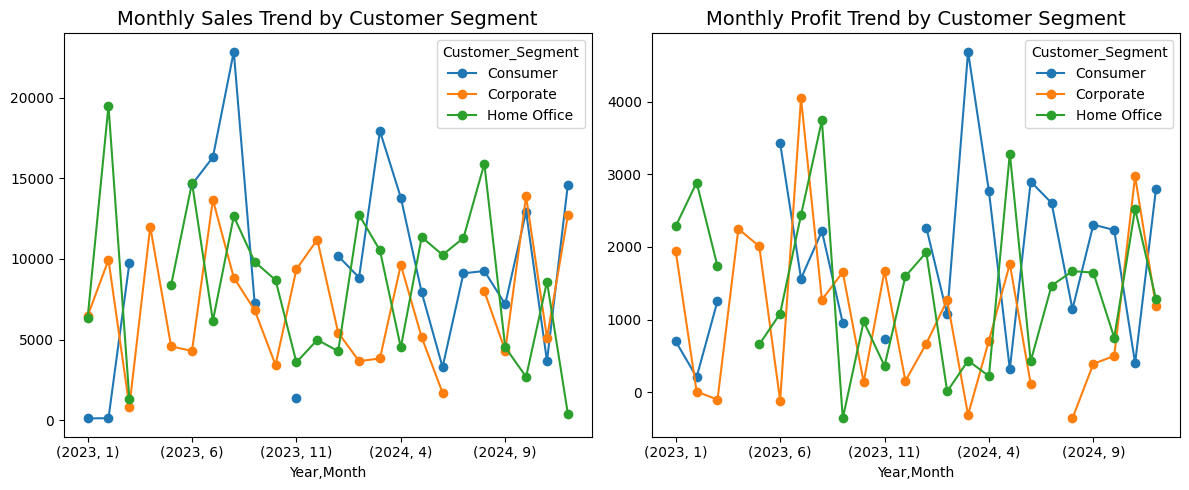

In [109]:
# Group by Year, Month, and Segment
monthly_segment_sales = (sd.groupby(["Year", "Month", "Customer_Segment"])["Sales"].sum().reset_index())
monthly_segment_profit = (sd.groupby(["Year", "Month", "Customer_Segment"])["Profit"].sum().reset_index())
# Pivot for plotting
fig,axes= plt.subplots(1,2,figsize=(12,5))
monthly_segment_sales.pivot(index=["Year", "Month"], columns="Customer_Segment", values="Sales").plot(marker="o",ax=axes[0])
axes[0].set_title("Monthly Sales Trend by Customer Segment",fontsize=14)
monthly_segment_profit.pivot(index=["Year", "Month"], columns="Customer_Segment", values="Profit").plot(marker="o",ax=axes[1])
axes[1].set_title("Monthly Profit Trend by Customer Segment",fontsize=14)
plt.tight_layout()
plt.show()


- Corporate & Home Office: Sales do not always convert to profit.
- Consumer: Clearer correlation between sales & profit. it is most profitable and consistent growth driver.
- Leverage seasonality: Both Sales & Profit show peaks mid-year (Jun–Jul) and year-end (Nov–Dec) across segments.

In [110]:
# Segment-wise summary including Profit Margin
summary = (sd.groupby("Customer_Segment").agg(
          Total_Sales=("Sales", "sum"),
          Total_Profit=("Profit", "sum"),
          Avg_Sales=("Sales", "mean"),
          Avg_Profit=("Profit", "mean"),
          Avg_Profit_Margin=("Profit_Margin", "mean") 
      ).reset_index()
)

print(summary)


  Customer_Segment  Total_Sales  Total_Profit    Avg_Sales  Avg_Profit  \
0         Consumer    191175.37      36546.56  2731.076714  522.093714   
1        Corporate    164867.08      23812.47  2747.784667  396.874500   
2      Home Office    193227.84      33023.99  2760.397714  471.771286   

   Avg_Profit_Margin  
0           0.616869  
1           0.535410  
2           0.323833  


- Consumer is the most profitable and efficient segment. Strong balance of high sales + best margin.
- Corporate segment contributes the least in both sales & profit, but margin is still decent. Needs sales growth.
- Home Office generates big sales but with weak profitability (lowest margin , maybe due to heavy discounts).

### Conclusion from Time Series Analysis
- Strong Seasonality: Sales and profit consistently peak in Q4 (Nov–Dec) and mid-year (Jul–Aug), with predictable dips in Jan–Feb.
- Year-over-Year Growth: 2024 outperformed 2023 in most quarters, confirming healthy growth, though Q3 2024 saw an unusual sales and profit dip compared to 2023.
- Segment Dynamics: Consumer segment is the most reliable driver of both sales and profit, while Home Office delivers high sales but weak margins, and Corporate remains steady but low-growth.
- Weekday Patterns: Sales peak mid-week (Wed–Thu), but profitability is highest on Tue & Sun, showing sales volume does not always equal efficiency.
- Profitability Trends: Profit is rising faster than sales in peak periods, indicating better efficiency and margin management during seasonal spikes.

In [111]:
# Export for viz 
sd.to_csv("Clean_Sales_Dashboard_Dataset.csv",index=False)